In [952]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib as mp

# I saved all data files to my github account and read the data from there
# First we will start with the people dataset
url_people = 'https://raw.githubusercontent.com/cas0105/BaseballHOF/main/People.csv'
people = pd.read_csv(url_people, sep = ',')
people

playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
0      aardsda01     1981.0        12.0      27.0          USA         CO   
1      aaronha01     1934.0         2.0       5.0          USA         AL   
2      aaronto01     1939.0         8.0       5.0          USA         AL   
3       aasedo01     1954.0         9.0       8.0          USA         CA   
4       abadan01     1972.0         8.0      25.0          USA         FL   
...          ...        ...         ...       ...          ...        ...   
20365   zupofr01     1939.0         8.0      29.0          USA         CA   
20366  zuvelpa01     1958.0        10.0      31.0          USA         CA   
20367  zuverge01     1924.0         8.0      20.0          USA         MI   
20368  zwilldu01     1888.0        11.0       2.0          USA         MO   
20369   zychto01     1990.0         8.0       7.0          USA         IL   

           birthCity  deathYear  deathMonth  deathDay deathCountry deathState  \
0             Denver        NaN         NaN       NaN          NaN        NaN   
1             Mobile     2021.0         1.0      22.0          USA         GA   
2             Mobile     1984.0         8.0      16.0          USA         GA   
3             Orange        NaN         NaN       NaN          NaN        NaN   
4         Palm Beach        NaN         NaN       NaN          NaN        NaN   
...              ...        ...         ...       ...          ...        ...   
20365  San Francisco     2005.0         3.0      25.0          USA         CA   
20366      San Mateo        NaN         NaN       NaN          NaN        NaN   
20367        Holland     2014.0         9.0       8.0          USA         AZ   
20368      St. Louis     1978.0         3.0      27.0          USA         CA   
20369          Monee        NaN         NaN       NaN          NaN        NaN   

          deathCity nameFirst  nameLast        nameGiven  weight  height bats  \
0               NaN     David   Aardsma      David Allan   215.0    75.0    R   
1           Atlanta      Hank     Aaron      Henry Louis   180.0    72.0    R   
2           Atlanta    Tommie     Aaron       Tommie Lee   190.0    75.0    R   
3               NaN       Don      Aase   Donald William   190.0    75.0    R   
4               NaN      Andy      Abad    Fausto Andres   184.0    73.0    L   
...             ...       ...       ...              ...     ...     ...  ...   
20365    Burlingame     Frank      Zupo     Frank Joseph   182.0    71.0    L   
20366           NaN      Paul   Zuvella             Paul   173.0    72.0    R   
20367         Tempe    George  Zuverink           George   195.0    76.0    R   
20368  La Crescenta     Dutch  Zwilling  Edward Harrison   160.0    66.0    L   
20369           NaN      Tony      Zych    Anthony Aaron   190.0    75.0    R   

      throws       debut   finalGame   retroID    bbrefID  
0          R  2004-04-06  2015-08-23  aardd001  aardsda01  
1          R  1954-04-13  1976-10-03  aaroh101  aaronha01  
2          R  1962-04-10  1971-09-26  aarot101  aaronto01  
3          R  1977-07-26  1990-10-03  aased001   aasedo01  
4          L  2001-09-10  2006-04-13  abada001   abadan01  
...      ...         ...         ...       ...        ...  
20365      R  1957-07-01  1961-05-09  zupof101   zupofr01  
20366      R  1982-09-04  1991-05-02  zuvep001  zuvelpa01  
20367      R  1951-04-21  1959-06-15  zuveg101  zuverge01  
20368      L  1910-08-14  1916-07-12  zwild101  zwilldu01  
20369      R  2015-09-04  2017-08-19  zycht001   zychto01  

[20370 rows x 24 columns]

In [953]:
# read the HOF dataset
url_hof = 'https://raw.githubusercontent.com/cas0105/BaseballHOF/main/HallOfFame.csv'
hof = pd.read_csv(url_hof, sep = ',')
hof

playerID  yearID   votedBy  ballots  needed  votes inducted category  \
0      cobbty01    1936     BBWAA    226.0   170.0  222.0        Y   Player   
1      ruthba01    1936     BBWAA    226.0   170.0  215.0        Y   Player   
2     wagneho01    1936     BBWAA    226.0   170.0  215.0        Y   Player   
3     mathech01    1936     BBWAA    226.0   170.0  205.0        Y   Player   
4     johnswa01    1936     BBWAA    226.0   170.0  189.0        Y   Player   
...         ...     ...       ...      ...     ...    ...      ...      ...   
4186  lidgebr01    2018     BBWAA    422.0   317.0    0.0        N   Player   
4187  millwke01    2018     BBWAA    422.0   317.0    0.0        N   Player   
4188  zambrca01    2018     BBWAA    422.0   317.0    0.0        N   Player   
4189  morrija02    2018  Veterans      NaN     NaN    NaN        Y   Player   
4190  trammal01    2018  Veterans      NaN     NaN    NaN        Y   Player   

     needed_note  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
4186         NaN  
4187         NaN  
4188         NaN  
4189         NaN  
4190         NaN  

[4191 rows x 9 columns]

In [954]:
# we will be removing all pitchers from the final dataset
# to do this, we will load the appearances table and get a list of all playerIDs that have less than 10 games pitched with more than 50 games as a hitter
# this should remove all primary pitchers from the dataset but keep any field players that also pitched
url_appearances = 'https://raw.githubusercontent.com/cas0105/BaseballHOF/main/Appearances.csv'

In [955]:
appearances = pd.read_csv(url_appearances, sep = ',')
appearances

yearID teamID lgID   playerID  G_all    GS  G_batting  G_defense  G_p  \
0         1871    TRO  NaN  abercda01      1   1.0          1        1.0    0   
1         1871    RC1  NaN   addybo01     25  25.0         25       25.0    0   
2         1871    CL1  NaN  allisar01     29  29.0         29       29.0    0   
3         1871    WS3  NaN  allisdo01     27  27.0         27       27.0    0   
4         1871    RC1  NaN  ansonca01     25  25.0         25       25.0    0   
...        ...    ...  ...        ...    ...   ...        ...        ...  ...   
110418    2021    MIL   NL  zimmejo02      2   0.0          2        2.0    2   
110419    2021    KCA   AL  zimmeky01     52   2.0          3       52.0   52   
110420    2021    WAS   NL  zimmery01    110  48.0        110       54.0    0   
110421    2021    KCA   AL  zuberty01     31   0.0          1       31.0   31   
110422    2021    TBA   AL  zuninmi01    109  97.0        109      105.0    0   

        G_c  G_1b  G_2b  G_3b  G_ss  G_lf  G_cf  G_rf  G_of  G_dh  G_ph  G_pr  
0         0     0     0     0     1     0     0     0     0   0.0   0.0   0.0  
1         0     0    22     0     3     0     0     0     0   0.0   0.0   0.0  
2         0     0     2     0     0     0    29     0    29   0.0   0.0   0.0  
3        27     0     0     0     0     0     0     0     0   0.0   0.0   0.0  
4         5     1     2    20     0     1     0     0     1   0.0   0.0   0.0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
110418    0     0     0     0     0     0     0     0     0   0.0   0.0   0.0  
110419    0     0     0     0     0     0     0     0     0   0.0   0.0   0.0  
110420    0    54     0     0     0     0     0     0     0   3.0  58.0   0.0  
110421    0     0     0     0     0     0     0     0     0   0.0   0.0   0.0  
110422  105     0     0     0     0     0     0     0     0   0.0   5.0   0.0  

[110423 rows x 21 columns]

In [956]:
# sum total games pitches and games batted by playerID
appearances_playerid = appearances.set_index(['playerID'])
appearances_playerid = appearances_playerid.groupby('playerID', as_index=True)[['G_batting', 'G_p']].sum()
appearances_playerid

G_batting  G_p
playerID                 
aardsda01        139  331
aaronha01       3298    0
aaronto01        437    0
aasedo01          81  448
abadan01          15    0
...              ...  ...
zupofr01          16    0
zuvelpa01        209    0
zuverge01        266  265
zwilldu01        367    0
zychto01           4   70

[20167 rows x 2 columns]

In [957]:
appearances_batters = appearances_playerid.query('G_p < 100 & G_batting > 100')
appearances_batters

G_batting  G_p
playerID                 
aaronha01       3298    0
aaronto01        437    0
abbated01        857    0
abbeych01        452    1
abbotfr01        160    0
...              ...  ...
zobribe01       1651    1
zuninmi01        814    0
zupcibo01        319    0
zuvelpa01        209    0
zwilldu01        367    0

[5874 rows x 2 columns]

In [958]:
# read the batting and postseason batting datasets
url_batting = 'https://raw.githubusercontent.com/cas0105/BaseballHOF/main/Batting.csv'
url_battingpost = 'https://raw.githubusercontent.com/cas0105/BaseballHOF/main/BattingPost.csv'
batting = pd.read_csv(url_batting, sep = ',')
battingpost = pd.read_csv(url_battingpost, sep = ',')

In [959]:
# read the fielding and postseason fielding datasets
url_fielding = 'https://raw.githubusercontent.com/cas0105/BaseballHOF/main/Fielding.csv'
url_fieldingpost = 'https://raw.githubusercontent.com/cas0105/BaseballHOF/main/FieldingPost.csv'
fielding = pd.read_csv(url_fielding, sep = ',')
fieldingpost = pd.read_csv(url_fieldingpost, sep = ',')

In [960]:
# read the allstar dataset
url_allstar = 'https://raw.githubusercontent.com/cas0105/BaseballHOF/main/AllstarFull.csv'
allstar = pd.read_csv(url_allstar, sep = ',')
allstar

playerID  yearID  gameNum        gameID teamID lgID  GP  startingPos
0     gomezle01    1933        0  ALS193307060    NYA   AL   1          1.0
1     ferreri01    1933        0  ALS193307060    BOS   AL   1          2.0
2     gehrilo01    1933        0  ALS193307060    NYA   AL   1          3.0
3     gehrich01    1933        0  ALS193307060    DET   AL   1          4.0
4     dykesji01    1933        0  ALS193307060    CHA   AL   1          5.0
...         ...     ...      ...           ...    ...  ...  ..          ...
5449  turneju01    2021        0  NLS202107130    LAN   NL   1          NaN
5450  turnetr01    2021        0  NLS202107130    WAS   NL   1          NaN
5451  walketa01    2021        0  NLS202107130    NYN   NL   1          NaN
5452  wheelza01    2021        0  NLS202107130    PHI   NL   0          NaN
5453  woodrbr01    2021        0  NLS202107130    MIL   NL   0          NaN

[5454 rows x 8 columns]

In [961]:
# read the awards dataset
url_awards = 'https://raw.githubusercontent.com/cas0105/BaseballHOF/main/AwardsPlayers.csv'
awards = pd.read_csv(url_awards, sep = ',')
awards

playerID                awardID  yearID lgID  tie notes
0      bondto01  Pitching Triple Crown    1877   NL  NaN   NaN
1     hinespa01           Triple Crown    1878   NL  NaN   NaN
2     heckegu01  Pitching Triple Crown    1884   AA  NaN   NaN
3     radboch01  Pitching Triple Crown    1884   NL  NaN   NaN
4     oneilti01           Triple Crown    1887   AA  NaN   NaN
...         ...                    ...     ...  ...  ...   ...
6526  reynobr01           TSN All-Star    2021   NL  NaN    OF
6527  scherma01           TSN All-Star    2021   NL  NaN    SP
6528  haderjo01           TSN All-Star    2021   NL  NaN    RP
6529  friedma01         Silver Slugger    2021   NL  NaN     P
6530  ramirjo01           TSN All-Star    2021   AL  NaN    3B

[6531 rows x 6 columns]

In [962]:
# Next, we will need to manipulate some of the data to get career statistics for each player
# First will be batting
batting

playerID  yearID  stint teamID lgID    G   AB   R   H  2B  3B  HR  \
0       abercda01    1871      1    TRO  NaN    1    4   0   0   0   0   0   
1        addybo01    1871      1    RC1  NaN   25  118  30  32   6   0   0   
2       allisar01    1871      1    CL1  NaN   29  137  28  40   4   5   0   
3       allisdo01    1871      1    WS3  NaN   27  133  28  44  10   2   2   
4       ansonca01    1871      1    RC1  NaN   25  120  29  39  11   3   0   
...           ...     ...    ...    ...  ...  ...  ...  ..  ..  ..  ..  ..   
110490  zimmejo02    2021      1    MIL   NL    2    1   0   0   0   0   0   
110491  zimmeky01    2021      1    KCA   AL   52    0   0   0   0   0   0   
110492  zimmery01    2021      1    WAS   NL  110  255  27  62  16   0  14   
110493  zuberty01    2021      1    KCA   AL   31    1   0   0   0   0   0   
110494  zuninmi01    2021      1    TBA   AL  109  333  64  72  11   2  33   

         RBI   SB   CS  BB     SO  IBB  HBP   SH   SF  GIDP  
0        0.0  0.0  0.0   0    0.0  NaN  NaN  NaN  NaN   0.0  
1       13.0  8.0  1.0   4    0.0  NaN  NaN  NaN  NaN   0.0  
2       19.0  3.0  1.0   2    5.0  NaN  NaN  NaN  NaN   1.0  
3       27.0  1.0  1.0   0    2.0  NaN  NaN  NaN  NaN   0.0  
4       16.0  6.0  2.0   2    1.0  NaN  NaN  NaN  NaN   0.0  
...      ...  ...  ...  ..    ...  ...  ...  ...  ...   ...  
110490   0.0  0.0  0.0   0    1.0  0.0  0.0  0.0  0.0   0.0  
110491   0.0  0.0  0.0   0    0.0  0.0  0.0  0.0  0.0   0.0  
110492  46.0  0.0  0.0  16   77.0  0.0  0.0  0.0  2.0   9.0  
110493   0.0  0.0  0.0   0    1.0  0.0  0.0  0.0  0.0   0.0  
110494  62.0  0.0  0.0  34  132.0  0.0  7.0  0.0  1.0   7.0  

[110495 rows x 22 columns]

In [963]:
batting_playerid = batting.set_index(['playerID'])
batting_playerid = batting_playerid.groupby('playerID', as_index=True)[['G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO', 'IBB', 'SF', 'SH', 'HBP']].sum()
batting_playerid

G     AB     R     H   2B  3B   HR     RBI     SB    BB      SO  \
playerID                                                                        
aardsda01   331      4     0     0    0   0    0     0.0    0.0     0     2.0   
aaronha01  3298  12364  2174  3771  624  98  755  2297.0  240.0  1402  1383.0   
aaronto01   437    944   102   216   42   6   13    94.0    9.0    86   145.0   
aasedo01    448      5     0     0    0   0    0     0.0    0.0     0     3.0   
abadan01     15     21     1     2    0   0    0     0.0    0.0     4     5.0   
...         ...    ...   ...   ...  ...  ..  ...     ...    ...   ...     ...   
zupofr01     16     18     3     3    1   0    0     0.0    0.0     2     6.0   
zuvelpa01   209    491    41   109   17   2    2    20.0    2.0    34    50.0   
zuverge01   266    142     5    21    2   1    0     7.0    0.0     9    39.0   
zwilldu01   366   1280   167   364   76  15   30   202.0   46.0   128   155.0   
zychto01     70      0     0     0    0   0    0     0.0    0.0     0     0.0   

             IBB     SF    SH   HBP  
playerID                             
aardsda01    0.0    0.0   1.0   0.0  
aaronha01  293.0  121.0  21.0  32.0  
aaronto01    3.0    6.0   9.0   0.0  
aasedo01     0.0    0.0   0.0   0.0  
abadan01     0.0    0.0   0.0   0.0  
...          ...    ...   ...   ...  
zupofr01     0.0    0.0   0.0   0.0  
zuvelpa01    1.0    0.0  18.0   2.0  
zuverge01    0.0    0.0  16.0   0.0  
zwilldu01    0.0    0.0  31.0   4.0  
zychto01     0.0    0.0   0.0   0.0  

[20166 rows x 15 columns]

In [964]:
# I will create some additional variables using some already in the dataframe
batting_playerid['1B'] = batting_playerid['H'] - batting_playerid['2B'] - batting_playerid['3B'] - batting_playerid['HR'] # number of singles
batting_playerid['TB'] = batting_playerid['1B'] + (2*batting_playerid['2B']) + (3*batting_playerid['3B']) + (4*batting_playerid['HR']) # total bases calculation
batting_playerid['H%'] = batting_playerid['H'] / batting_playerid['AB'] # H% will be percent of ABs that result in a H
batting_playerid['HR%'] = batting_playerid['HR'] / batting_playerid['AB'] # HR% will be percent of ABs that result in a HR
batting_playerid['R%'] = batting_playerid['R'] / batting_playerid['AB'] # R% will be percent of ABs that result in a R
batting_playerid['OBP'] = (batting_playerid['H']+batting_playerid['BB']+batting_playerid['HBP']) / (batting_playerid['AB']+batting_playerid['BB']+batting_playerid['HBP']+batting_playerid['SF']) #On Base %
batting_playerid['SLG'] = batting_playerid['TB'] / batting_playerid['AB'] # slugging %
batting_playerid['OPS'] = batting_playerid['OBP'] + batting_playerid['SLG'] # on base plus slugging
batting_playerid

G     AB     R     H   2B  3B   HR     RBI     SB    BB      SO  \
playerID                                                                        
aardsda01   331      4     0     0    0   0    0     0.0    0.0     0     2.0   
aaronha01  3298  12364  2174  3771  624  98  755  2297.0  240.0  1402  1383.0   
aaronto01   437    944   102   216   42   6   13    94.0    9.0    86   145.0   
aasedo01    448      5     0     0    0   0    0     0.0    0.0     0     3.0   
abadan01     15     21     1     2    0   0    0     0.0    0.0     4     5.0   
...         ...    ...   ...   ...  ...  ..  ...     ...    ...   ...     ...   
zupofr01     16     18     3     3    1   0    0     0.0    0.0     2     6.0   
zuvelpa01   209    491    41   109   17   2    2    20.0    2.0    34    50.0   
zuverge01   266    142     5    21    2   1    0     7.0    0.0     9    39.0   
zwilldu01   366   1280   167   364   76  15   30   202.0   46.0   128   155.0   
zychto01     70      0     0     0    0   0    0     0.0    0.0     0     0.0   

             IBB     SF    SH   HBP    1B    TB        H%       HR%        R%  \
playerID                                                                        
aardsda01    0.0    0.0   1.0   0.0     0     0  0.000000  0.000000  0.000000   
aaronha01  293.0  121.0  21.0  32.0  2294  6856  0.304998  0.061064  0.175833   
aaronto01    3.0    6.0   9.0   0.0   155   309  0.228814  0.013771  0.108051   
aasedo01     0.0    0.0   0.0   0.0     0     0  0.000000  0.000000  0.000000   
abadan01     0.0    0.0   0.0   0.0     2     2  0.095238  0.000000  0.047619   
...          ...    ...   ...   ...   ...   ...       ...       ...       ...   
zupofr01     0.0    0.0   0.0   0.0     2     4  0.166667  0.000000  0.166667   
zuvelpa01    1.0    0.0  18.0   2.0    88   136  0.221996  0.004073  0.083503   
zuverge01    0.0    0.0  16.0   0.0    18    25  0.147887  0.000000  0.035211   
zwilldu01    0.0    0.0  31.0   4.0   243   560  0.284375  0.023438  0.130469   
zychto01     0.0    0.0   0.0   0.0     0     0       NaN       NaN       NaN   

                OBP       SLG       OPS  
playerID                                 
aardsda01  0.000000  0.000000  0.000000  
aaronha01  0.373949  0.554513  0.928462  
aaronto01  0.291506  0.327331  0.618836  
aasedo01   0.000000  0.000000  0.000000  
abadan01   0.240000  0.095238  0.335238  
...             ...       ...       ...  
zupofr01   0.250000  0.222222  0.472222  
zuvelpa01  0.275142  0.276986  0.552128  
zuverge01  0.198675  0.176056  0.374732  
zwilldu01  0.351275  0.437500  0.788775  
zychto01        NaN       NaN       NaN  

[20166 rows x 23 columns]

In [965]:
batting_playerid.isna().sum() # to see the number of null values

G         0
AB        0
R         0
H         0
2B        0
3B        0
HR        0
RBI       0
SB        0
BB        0
SO        0
IBB       0
SF        0
SH        0
HBP       0
1B        0
TB        0
H%     2325
HR%    2325
R%     2284
OBP    2273
SLG    2325
OPS    2325
dtype: int64

In [966]:
batting_playerid[batting_playerid.isna().any(axis=1)]
# as we can see, there are 2325 players in the dataset with 0 recorded at bats
# we will set their %s to 0
batting_playerid = batting_playerid.replace(np.nan, 0)
batting_playerid

G     AB     R     H   2B  3B   HR     RBI     SB    BB      SO  \
playerID                                                                        
aardsda01   331      4     0     0    0   0    0     0.0    0.0     0     2.0   
aaronha01  3298  12364  2174  3771  624  98  755  2297.0  240.0  1402  1383.0   
aaronto01   437    944   102   216   42   6   13    94.0    9.0    86   145.0   
aasedo01    448      5     0     0    0   0    0     0.0    0.0     0     3.0   
abadan01     15     21     1     2    0   0    0     0.0    0.0     4     5.0   
...         ...    ...   ...   ...  ...  ..  ...     ...    ...   ...     ...   
zupofr01     16     18     3     3    1   0    0     0.0    0.0     2     6.0   
zuvelpa01   209    491    41   109   17   2    2    20.0    2.0    34    50.0   
zuverge01   266    142     5    21    2   1    0     7.0    0.0     9    39.0   
zwilldu01   366   1280   167   364   76  15   30   202.0   46.0   128   155.0   
zychto01     70      0     0     0    0   0    0     0.0    0.0     0     0.0   

             IBB     SF    SH   HBP    1B    TB        H%       HR%        R%  \
playerID                                                                        
aardsda01    0.0    0.0   1.0   0.0     0     0  0.000000  0.000000  0.000000   
aaronha01  293.0  121.0  21.0  32.0  2294  6856  0.304998  0.061064  0.175833   
aaronto01    3.0    6.0   9.0   0.0   155   309  0.228814  0.013771  0.108051   
aasedo01     0.0    0.0   0.0   0.0     0     0  0.000000  0.000000  0.000000   
abadan01     0.0    0.0   0.0   0.0     2     2  0.095238  0.000000  0.047619   
...          ...    ...   ...   ...   ...   ...       ...       ...       ...   
zupofr01     0.0    0.0   0.0   0.0     2     4  0.166667  0.000000  0.166667   
zuvelpa01    1.0    0.0  18.0   2.0    88   136  0.221996  0.004073  0.083503   
zuverge01    0.0    0.0  16.0   0.0    18    25  0.147887  0.000000  0.035211   
zwilldu01    0.0    0.0  31.0   4.0   243   560  0.284375  0.023438  0.130469   
zychto01     0.0    0.0   0.0   0.0     0     0  0.000000  0.000000  0.000000   

                OBP       SLG       OPS  
playerID                                 
aardsda01  0.000000  0.000000  0.000000  
aaronha01  0.373949  0.554513  0.928462  
aaronto01  0.291506  0.327331  0.618836  
aasedo01   0.000000  0.000000  0.000000  
abadan01   0.240000  0.095238  0.335238  
...             ...       ...       ...  
zupofr01   0.250000  0.222222  0.472222  
zuvelpa01  0.275142  0.276986  0.552128  
zuverge01  0.198675  0.176056  0.374732  
zwilldu01  0.351275  0.437500  0.788775  
zychto01   0.000000  0.000000  0.000000  

[20166 rows x 23 columns]

In [967]:
# next we will look at postseason batting stats
battingpost

yearID  round   playerID teamID lgID  G  AB  R  H  2B  3B  HR  RBI  SB  \
0        1884     WS  becanbu01    NY4   AA  1   2  0  1   0   0   0    0   0   
1        1884     WS  bradyst01    NY4   AA  3  10  1  0   0   0   0    0   0   
2        1884     WS  carrocl01    PRO   NL  3  10  2  1   0   0   0    1   0   
3        1884     WS  dennyje01    PRO   NL  3   9  3  4   0   1   1    2   0   
4        1884     WS  esterdu01    NY4   AA  3  10  0  3   1   0   0    0   1   
...       ...    ...        ...    ...  ... ..  .. .. ..  ..  ..  ..  ...  ..   
15874    2021     WS  wrighky01    ATL   NL  2   1  0  0   0   0   0    0   0   
15875    2021  NLDS2  yastrmi01    SFN   NL  5  13  0  0   0   0   0    0   0   
15876    2021  NLDS1  yelicch01    MIL   NL  4  15  1  3   0   0   0    0   1   
15877    2021  NLDS1   ynoahu01    ATL   NL  1   0  0  0   0   0   0    0   0   
15878    2021  ALDS2  zuninmi01    TBA   AL  4  15  1  2   1   0   0    0   0   

        CS  BB  SO  IBB  HBP   SH   SF  GIDP  
0      NaN   0   0    0  NaN  NaN  NaN   NaN  
1      NaN   0   1    0  NaN  NaN  NaN   NaN  
2      NaN   1   1    0  NaN  NaN  NaN   NaN  
3      NaN   0   3    0  NaN  NaN  NaN   NaN  
4      NaN   0   3    0  NaN  NaN  NaN   NaN  
...    ...  ..  ..  ...  ...  ...  ...   ...  
15874  0.0   0   1    0  0.0  0.0  0.0   0.0  
15875  0.0   0   4    0  0.0  0.0  0.0   0.0  
15876  0.0   2   8    0  0.0  0.0  0.0   1.0  
15877  0.0   0   0    0  0.0  0.0  0.0   0.0  
15878  0.0   0   6    0  0.0  0.0  0.0   0.0  

[15879 rows x 22 columns]

In [968]:
battingpost_playerid = battingpost.set_index(['playerID'])
battingpost_playerid = battingpost_playerid.groupby('playerID', as_index=True)[['G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO', 'IBB', 'SF', 'SH', 'HBP']].sum()
battingpost_playerid

G   AB   R   H  2B  3B  HR  RBI  SB  BB  SO  IBB   SF   SH  HBP
playerID                                                                   
aaronha01  17   69  11  25   4   1   6   16   0   5  13    0  0.0  0.0  0.0
aaronto01   1    1   0   0   0   0   0    0   0   0   0    0  0.0  0.0  0.0
aasedo01    2    0   0   0   0   0   0    0   0   0   0    0  0.0  0.0  0.0
abadfe01    1    0   0   0   0   0   0    0   0   0   0    0  0.0  0.0  0.0
abbated01   1    1   0   0   0   0   0    0   0   0   1    0  0.0  0.0  0.0
...        ..  ...  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ...  ...  ...
zitoba01   10    5   0   2   0   0   0    2   0   0   2    0  0.0  1.0  0.0
zobribe01  64  228  34  55  17   1   4   14   1  21  38    2  2.0  1.0  1.0
zuberbi01   1    0   0   0   0   0   0    0   0   0   0    0  0.0  0.0  0.0
zumayjo01   6    0   0   0   0   0   0    0   0   0   0    0  0.0  0.0  0.0
zuninmi01  23   68   5  11   1   0   4    8   0   1  33    0  1.0  0.0  1.0

[4734 rows x 15 columns]

In [969]:
# I will create some additional variables using some already in the dataframe
battingpost_playerid['1B'] = battingpost_playerid['H'] - battingpost_playerid['2B'] - battingpost_playerid['3B'] - battingpost_playerid['HR'] # number of singles
battingpost_playerid['TB'] = battingpost_playerid['1B'] + (2*battingpost_playerid['2B']) + (3*battingpost_playerid['3B']) + (4*battingpost_playerid['HR']) # total bases calculation
battingpost_playerid['H%'] = battingpost_playerid['H'] / battingpost_playerid['AB'] # H% will be percent of ABs that result in a H
battingpost_playerid['HR%'] = battingpost_playerid['HR'] / battingpost_playerid['AB'] # HR% will be percent of ABs that result in a HR
battingpost_playerid['R%'] = battingpost_playerid['R'] / battingpost_playerid['AB'] # R% will be percent of ABs that result in a R
battingpost_playerid['OBP'] = (battingpost_playerid['H']+battingpost_playerid['BB']+battingpost_playerid['HBP']) / (battingpost_playerid['AB']+battingpost_playerid['BB']+battingpost_playerid['HBP']+battingpost_playerid['SF']) #On Base %
battingpost_playerid['SLG'] = battingpost_playerid['TB'] / battingpost_playerid['AB'] # slugging %
battingpost_playerid['OPS'] = battingpost_playerid['OBP'] + battingpost_playerid['SLG'] # on base plus slugging
battingpost_playerid

G   AB   R   H  2B  3B  HR  RBI  SB  BB  SO  IBB   SF   SH  HBP  \
playerID                                                                      
aaronha01  17   69  11  25   4   1   6   16   0   5  13    0  0.0  0.0  0.0   
aaronto01   1    1   0   0   0   0   0    0   0   0   0    0  0.0  0.0  0.0   
aasedo01    2    0   0   0   0   0   0    0   0   0   0    0  0.0  0.0  0.0   
abadfe01    1    0   0   0   0   0   0    0   0   0   0    0  0.0  0.0  0.0   
abbated01   1    1   0   0   0   0   0    0   0   0   1    0  0.0  0.0  0.0   
...        ..  ...  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ...  ...  ...   
zitoba01   10    5   0   2   0   0   0    2   0   0   2    0  0.0  1.0  0.0   
zobribe01  64  228  34  55  17   1   4   14   1  21  38    2  2.0  1.0  1.0   
zuberbi01   1    0   0   0   0   0   0    0   0   0   0    0  0.0  0.0  0.0   
zumayjo01   6    0   0   0   0   0   0    0   0   0   0    0  0.0  0.0  0.0   
zuninmi01  23   68   5  11   1   0   4    8   0   1  33    0  1.0  0.0  1.0   

           1B  TB        H%       HR%        R%       OBP       SLG       OPS  
playerID                                                                       
aaronha01  14  49  0.362319  0.086957  0.159420  0.405405  0.710145  1.115550  
aaronto01   0   0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
aasedo01    0   0       NaN       NaN       NaN       NaN       NaN       NaN  
abadfe01    0   0       NaN       NaN       NaN       NaN       NaN       NaN  
abbated01   0   0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
...        ..  ..       ...       ...       ...       ...       ...       ...  
zitoba01    2   2  0.400000  0.000000  0.000000  0.400000  0.400000  0.800000  
zobribe01  33  86  0.241228  0.017544  0.149123  0.305556  0.377193  0.682749  
zuberbi01   0   0       NaN       NaN       NaN       NaN       NaN       NaN  
zumayjo01   0   0       NaN       NaN       NaN       NaN       NaN       NaN  
zuninmi01   6  24  0.161765  0.058824  0.073529  0.183099  0.352941  0.536040  

[4734 rows x 23 columns]

In [970]:
battingpost_playerid[battingpost_playerid.isna().any(axis=1)]
# we will set their %s to 0
battingpost_playerid = battingpost_playerid.replace(np.nan, 0)
battingpost_playerid

G   AB   R   H  2B  3B  HR  RBI  SB  BB  SO  IBB   SF   SH  HBP  \
playerID                                                                      
aaronha01  17   69  11  25   4   1   6   16   0   5  13    0  0.0  0.0  0.0   
aaronto01   1    1   0   0   0   0   0    0   0   0   0    0  0.0  0.0  0.0   
aasedo01    2    0   0   0   0   0   0    0   0   0   0    0  0.0  0.0  0.0   
abadfe01    1    0   0   0   0   0   0    0   0   0   0    0  0.0  0.0  0.0   
abbated01   1    1   0   0   0   0   0    0   0   0   1    0  0.0  0.0  0.0   
...        ..  ...  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ...  ...  ...   
zitoba01   10    5   0   2   0   0   0    2   0   0   2    0  0.0  1.0  0.0   
zobribe01  64  228  34  55  17   1   4   14   1  21  38    2  2.0  1.0  1.0   
zuberbi01   1    0   0   0   0   0   0    0   0   0   0    0  0.0  0.0  0.0   
zumayjo01   6    0   0   0   0   0   0    0   0   0   0    0  0.0  0.0  0.0   
zuninmi01  23   68   5  11   1   0   4    8   0   1  33    0  1.0  0.0  1.0   

           1B  TB        H%       HR%        R%       OBP       SLG       OPS  
playerID                                                                       
aaronha01  14  49  0.362319  0.086957  0.159420  0.405405  0.710145  1.115550  
aaronto01   0   0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
aasedo01    0   0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
abadfe01    0   0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
abbated01   0   0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
...        ..  ..       ...       ...       ...       ...       ...       ...  
zitoba01    2   2  0.400000  0.000000  0.000000  0.400000  0.400000  0.800000  
zobribe01  33  86  0.241228  0.017544  0.149123  0.305556  0.377193  0.682749  
zuberbi01   0   0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
zumayjo01   0   0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
zuninmi01   6  24  0.161765  0.058824  0.073529  0.183099  0.352941  0.536040  

[4734 rows x 23 columns]

In [971]:
battingpost_playerid.rename(columns={'G': 'PostG', 'AB': 'PostAB', 'R': 'PostR','H': 'PostH','2B': 'Post2B','3B': 'Post3B','HR': 'PostHR','RBI': 'PostRBI','SB': 'PostSB','RBI': 'PostRBI','BB': 'PostBB','SO': 'PostSO','IBB': 'PostIBB','SF': 'PostSF','SH': 'PostSH','HBP': 'PostHBP','1B': 'Post1B','TB': 'PostTB','H%': 'PostH%','HR%': 'PostHR%','R%': 'PostR%','OBP': 'PostOBP','SLG': 'PostSLG', 'OPS': 'PostOPS'}, inplace=True)
battingpost_playerid

PostG  PostAB  PostR  PostH  Post2B  Post3B  PostHR  PostRBI  \
playerID                                                                  
aaronha01     17      69     11     25       4       1       6       16   
aaronto01      1       1      0      0       0       0       0        0   
aasedo01       2       0      0      0       0       0       0        0   
abadfe01       1       0      0      0       0       0       0        0   
abbated01      1       1      0      0       0       0       0        0   
...          ...     ...    ...    ...     ...     ...     ...      ...   
zitoba01      10       5      0      2       0       0       0        2   
zobribe01     64     228     34     55      17       1       4       14   
zuberbi01      1       0      0      0       0       0       0        0   
zumayjo01      6       0      0      0       0       0       0        0   
zuninmi01     23      68      5     11       1       0       4        8   

           PostSB  PostBB  PostSO  PostIBB  PostSF  PostSH  PostHBP  Post1B  \
playerID                                                                      
aaronha01       0       5      13        0     0.0     0.0      0.0      14   
aaronto01       0       0       0        0     0.0     0.0      0.0       0   
aasedo01        0       0       0        0     0.0     0.0      0.0       0   
abadfe01        0       0       0        0     0.0     0.0      0.0       0   
abbated01       0       0       1        0     0.0     0.0      0.0       0   
...           ...     ...     ...      ...     ...     ...      ...     ...   
zitoba01        0       0       2        0     0.0     1.0      0.0       2   
zobribe01       1      21      38        2     2.0     1.0      1.0      33   
zuberbi01       0       0       0        0     0.0     0.0      0.0       0   
zumayjo01       0       0       0        0     0.0     0.0      0.0       0   
zuninmi01       0       1      33        0     1.0     0.0      1.0       6   

           PostTB    PostH%   PostHR%    PostR%   PostOBP   PostSLG   PostOPS  
playerID                                                                       
aaronha01      49  0.362319  0.086957  0.159420  0.405405  0.710145  1.115550  
aaronto01       0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
aasedo01        0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
abadfe01        0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
abbated01       0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
...           ...       ...       ...       ...       ...       ...       ...  
zitoba01        2  0.400000  0.000000  0.000000  0.400000  0.400000  0.800000  
zobribe01      86  0.241228  0.017544  0.149123  0.305556  0.377193  0.682749  
zuberbi01       0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
zumayjo01       0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
zuninmi01      24  0.161765  0.058824  0.073529  0.183099  0.352941  0.536040  

[4734 rows x 23 columns]

In [972]:
# now we can create a combined batting dataframe that includes postseason batting statsistics if avaiable for a player based on playerID
batting_career_playerid = pd.merge(batting_playerid, battingpost_playerid, how="left", on="playerID")
batting_career_playerid

G     AB     R     H   2B  3B   HR     RBI     SB    BB      SO  \
playerID                                                                        
aardsda01   331      4     0     0    0   0    0     0.0    0.0     0     2.0   
aaronha01  3298  12364  2174  3771  624  98  755  2297.0  240.0  1402  1383.0   
aaronto01   437    944   102   216   42   6   13    94.0    9.0    86   145.0   
aasedo01    448      5     0     0    0   0    0     0.0    0.0     0     3.0   
abadan01     15     21     1     2    0   0    0     0.0    0.0     4     5.0   
...         ...    ...   ...   ...  ...  ..  ...     ...    ...   ...     ...   
zupofr01     16     18     3     3    1   0    0     0.0    0.0     2     6.0   
zuvelpa01   209    491    41   109   17   2    2    20.0    2.0    34    50.0   
zuverge01   266    142     5    21    2   1    0     7.0    0.0     9    39.0   
zwilldu01   366   1280   167   364   76  15   30   202.0   46.0   128   155.0   
zychto01     70      0     0     0    0   0    0     0.0    0.0     0     0.0   

             IBB     SF    SH   HBP    1B    TB        H%       HR%        R%  \
playerID                                                                        
aardsda01    0.0    0.0   1.0   0.0     0     0  0.000000  0.000000  0.000000   
aaronha01  293.0  121.0  21.0  32.0  2294  6856  0.304998  0.061064  0.175833   
aaronto01    3.0    6.0   9.0   0.0   155   309  0.228814  0.013771  0.108051   
aasedo01     0.0    0.0   0.0   0.0     0     0  0.000000  0.000000  0.000000   
abadan01     0.0    0.0   0.0   0.0     2     2  0.095238  0.000000  0.047619   
...          ...    ...   ...   ...   ...   ...       ...       ...       ...   
zupofr01     0.0    0.0   0.0   0.0     2     4  0.166667  0.000000  0.166667   
zuvelpa01    1.0    0.0  18.0   2.0    88   136  0.221996  0.004073  0.083503   
zuverge01    0.0    0.0  16.0   0.0    18    25  0.147887  0.000000  0.035211   
zwilldu01    0.0    0.0  31.0   4.0   243   560  0.284375  0.023438  0.130469   
zychto01     0.0    0.0   0.0   0.0     0     0  0.000000  0.000000  0.000000   

                OBP       SLG       OPS  PostG  PostAB  PostR  PostH  Post2B  \
playerID                                                                       
aardsda01  0.000000  0.000000  0.000000    NaN     NaN    NaN    NaN     NaN   
aaronha01  0.373949  0.554513  0.928462   17.0    69.0   11.0   25.0     4.0   
aaronto01  0.291506  0.327331  0.618836    1.0     1.0    0.0    0.0     0.0   
aasedo01   0.000000  0.000000  0.000000    2.0     0.0    0.0    0.0     0.0   
abadan01   0.240000  0.095238  0.335238    NaN     NaN    NaN    NaN     NaN   
...             ...       ...       ...    ...     ...    ...    ...     ...   
zupofr01   0.250000  0.222222  0.472222    NaN     NaN    NaN    NaN     NaN   
zuvelpa01  0.275142  0.276986  0.552128    NaN     NaN    NaN    NaN     NaN   
zuverge01  0.198675  0.176056  0.374732    NaN     NaN    NaN    NaN     NaN   
zwilldu01  0.351275  0.437500  0.788775    NaN     NaN    NaN    NaN     NaN   
zychto01   0.000000  0.000000  0.000000    NaN     NaN    NaN    NaN     NaN   

           Post3B  PostHR  PostRBI  PostSB  PostBB  PostSO  PostIBB  PostSF  \
playerID                                                                      
aardsda01     NaN     NaN      NaN     NaN     NaN     NaN      NaN     NaN   
aaronha01     1.0     6.0     16.0     0.0     5.0    13.0      0.0     0.0   
aaronto01     0.0     0.0      0.0     0.0     0.0     0.0      0.0     0.0   
aasedo01      0.0     0.0      0.0     0.0     0.0     0.0      0.0     0.0   
abadan01      NaN     NaN      NaN     NaN     NaN     NaN      NaN     NaN   
...           ...     ...      ...     ...     ...     ...      ...     ...   
zupofr01      NaN     NaN      NaN     NaN     NaN     NaN      NaN     NaN   
zuvelpa01     NaN     NaN      NaN     NaN     NaN     NaN      NaN     NaN   
zuverge01     NaN     NaN      NaN     NaN     NaN     NaN      NaN     NaN

In [973]:
batting_career_playerid = batting_career_playerid.replace(np.nan, 0)
batting_career_playerid

G     AB     R     H   2B  3B   HR     RBI     SB    BB      SO  \
playerID                                                                        
aardsda01   331      4     0     0    0   0    0     0.0    0.0     0     2.0   
aaronha01  3298  12364  2174  3771  624  98  755  2297.0  240.0  1402  1383.0   
aaronto01   437    944   102   216   42   6   13    94.0    9.0    86   145.0   
aasedo01    448      5     0     0    0   0    0     0.0    0.0     0     3.0   
abadan01     15     21     1     2    0   0    0     0.0    0.0     4     5.0   
...         ...    ...   ...   ...  ...  ..  ...     ...    ...   ...     ...   
zupofr01     16     18     3     3    1   0    0     0.0    0.0     2     6.0   
zuvelpa01   209    491    41   109   17   2    2    20.0    2.0    34    50.0   
zuverge01   266    142     5    21    2   1    0     7.0    0.0     9    39.0   
zwilldu01   366   1280   167   364   76  15   30   202.0   46.0   128   155.0   
zychto01     70      0     0     0    0   0    0     0.0    0.0     0     0.0   

             IBB     SF    SH   HBP    1B    TB        H%       HR%        R%  \
playerID                                                                        
aardsda01    0.0    0.0   1.0   0.0     0     0  0.000000  0.000000  0.000000   
aaronha01  293.0  121.0  21.0  32.0  2294  6856  0.304998  0.061064  0.175833   
aaronto01    3.0    6.0   9.0   0.0   155   309  0.228814  0.013771  0.108051   
aasedo01     0.0    0.0   0.0   0.0     0     0  0.000000  0.000000  0.000000   
abadan01     0.0    0.0   0.0   0.0     2     2  0.095238  0.000000  0.047619   
...          ...    ...   ...   ...   ...   ...       ...       ...       ...   
zupofr01     0.0    0.0   0.0   0.0     2     4  0.166667  0.000000  0.166667   
zuvelpa01    1.0    0.0  18.0   2.0    88   136  0.221996  0.004073  0.083503   
zuverge01    0.0    0.0  16.0   0.0    18    25  0.147887  0.000000  0.035211   
zwilldu01    0.0    0.0  31.0   4.0   243   560  0.284375  0.023438  0.130469   
zychto01     0.0    0.0   0.0   0.0     0     0  0.000000  0.000000  0.000000   

                OBP       SLG       OPS  PostG  PostAB  PostR  PostH  Post2B  \
playerID                                                                       
aardsda01  0.000000  0.000000  0.000000    0.0     0.0    0.0    0.0     0.0   
aaronha01  0.373949  0.554513  0.928462   17.0    69.0   11.0   25.0     4.0   
aaronto01  0.291506  0.327331  0.618836    1.0     1.0    0.0    0.0     0.0   
aasedo01   0.000000  0.000000  0.000000    2.0     0.0    0.0    0.0     0.0   
abadan01   0.240000  0.095238  0.335238    0.0     0.0    0.0    0.0     0.0   
...             ...       ...       ...    ...     ...    ...    ...     ...   
zupofr01   0.250000  0.222222  0.472222    0.0     0.0    0.0    0.0     0.0   
zuvelpa01  0.275142  0.276986  0.552128    0.0     0.0    0.0    0.0     0.0   
zuverge01  0.198675  0.176056  0.374732    0.0     0.0    0.0    0.0     0.0   
zwilldu01  0.351275  0.437500  0.788775    0.0     0.0    0.0    0.0     0.0   
zychto01   0.000000  0.000000  0.000000    0.0     0.0    0.0    0.0     0.0   

           Post3B  PostHR  PostRBI  PostSB  PostBB  PostSO  PostIBB  PostSF  \
playerID                                                                      
aardsda01     0.0     0.0      0.0     0.0     0.0     0.0      0.0     0.0   
aaronha01     1.0     6.0     16.0     0.0     5.0    13.0      0.0     0.0   
aaronto01     0.0     0.0      0.0     0.0     0.0     0.0      0.0     0.0   
aasedo01      0.0     0.0      0.0     0.0     0.0     0.0      0.0     0.0   
abadan01      0.0     0.0      0.0     0.0     0.0     0.0      0.0     0.0   
...           ...     ...      ...     ...     ...     ...      ...     ...   
zupofr01      0.0     0.0      0.0     0.0     0.0     0.0      0.0     0.0   
zuvelpa01     0.0     0.0      0.0     0.0     0.0     0.0      0.0     0.0   
zuverge01     0.0     0.0      0.0     0.0     0.0     0.0      0.0     0.0

In [974]:
# next we will focus on fielding statistics
fielding

playerID  yearID  stint teamID lgID POS    G    GS  InnOuts   PO   A  \
0       abercda01    1871      1    TRO  NaN  SS    1   1.0     24.0    1   3   
1        addybo01    1871      1    RC1  NaN  2B   22  22.0    606.0   67  72   
2        addybo01    1871      1    RC1  NaN  SS    3   3.0     96.0    8  14   
3       allisar01    1871      1    CL1  NaN  2B    2   0.0     18.0    1   4   
4       allisar01    1871      1    CL1  NaN  OF   29  29.0    729.0   51   3   
...           ...     ...    ...    ...  ...  ..  ...   ...      ...  ...  ..   
147075  zimmejo02    2021      1    MIL   NL   P    2   0.0     17.0    0   1   
147076  zimmeky01    2021      1    KCA   AL   P   52   2.0    162.0    4   5   
147077  zimmery01    2021      1    WAS   NL  1B   54  45.0   1202.0  338  15   
147078  zuberty01    2021      1    KCA   AL   P   31   0.0     82.0    1   3   
147079  zuninmi01    2021      1    TBA   AL   C  105  97.0   2581.0  909  37   

           E  DP    PB  WP    SB    CS  ZR  
0        2.0   0   NaN NaN   NaN   NaN NaN  
1       42.0   5   NaN NaN   NaN   NaN NaN  
2        7.0   0   NaN NaN   NaN   NaN NaN  
3        0.0   0   NaN NaN   NaN   NaN NaN  
4        7.0   1   NaN NaN   NaN   NaN NaN  
...      ...  ..   ...  ..   ...   ...  ..  
147075   0.0   0   NaN NaN   0.0   0.0 NaN  
147076   0.0   3   NaN NaN   2.0   1.0 NaN  
147077   0.0  30   NaN NaN   NaN   NaN NaN  
147078   0.0   0   NaN NaN   0.0   0.0 NaN  
147079   5.0   2  10.0 NaN  47.0  13.0 NaN  

[147080 rows x 18 columns]

In [975]:
fieldingpost

playerID  yearID teamID lgID  round POS  G  GS  InnOuts  PO   A  E  \
0      beaumgi01    1903    PIT   NL     WS  CF  8   8      210  21   0  0   
1      branski01    1903    PIT   NL     WS  1B  8   8      210  81   6  3   
2      clarkfr01    1903    PIT   NL     WS  LF  8   8      210  18   0  1   
3      colliji01    1903    BOS   AL     WS  3B  8   8      213   9  18  1   
4      crigelo01    1903    BOS   AL     WS   C  8   8      213  54   7  3   
...          ...     ...    ...  ...    ...  .. ..  ..      ...  ..  .. ..   
15058  yastrmi01    2021    SFN   NL  NLDS2  CF  3   2       37   4   0  0   
15059  yastrmi01    2021    SFN   NL  NLDS2  RF  4   2       56   6   0  0   
15060  yelicch01    2021    MIL   NL  NLDS1  LF  4   4      102   8   2  0   
15061   ynoahu01    2021    ATL   NL  NLDS1   P  1   0        3   0   0  0   
15062  zuninmi01    2021    TBA   AL  ALDS2   C  4   4      117  28   2  0   

       DP  TP   PB  SB  CS  
0       0   0  NaN NaN NaN  
1       5   0  NaN NaN NaN  
2       0   0  NaN NaN NaN  
3       1   0  NaN NaN NaN  
4       2   0  0.0 NaN NaN  
...    ..  ..  ...  ..  ..  
15058   0   0  NaN NaN NaN  
15059   0   0  NaN NaN NaN  
15060   2   0  NaN NaN NaN  
15061   0   0  NaN NaN NaN  
15062   0   0  2.0 NaN NaN  

[15063 rows x 17 columns]

In [976]:
fielding_playerid = fielding.set_index(['playerID'])
fielding_playerid = fielding_playerid.groupby('playerID', as_index=True)[['G','GS', 'InnOuts', 'PO', 'A', 'E', 'DP', 'PB', 'WP', 'SB', 'CS']].sum()
fielding_playerid

G      GS  InnOuts    PO    A      E   DP   PB   WP   SB   CS
playerID                                                                   
aardsda01   331     0.0   1011.0    11   29    3.0    2  0.0  0.0  0.0  0.0
aaronha01  3020  2977.0  78414.0  7436  429  144.0  218  0.0  0.0  0.0  0.0
aaronto01   387   206.0   6472.0  1317  113   22.0  124  0.0  0.0  0.0  0.0
aasedo01    448    91.0   3328.0    67  135   13.0   10  0.0  0.0  0.0  0.0
abadan01      9     4.0    138.0    37    1    1.0    3  0.0  0.0  0.0  0.0
...         ...     ...      ...   ...  ...    ...  ...  ...  ...  ...  ...
zupofr01     13     1.0    114.0    31    1    2.0    0  1.0  1.0  2.0  1.0
zuvelpa01   201   136.0   3844.0   267  415   23.0   84  0.0  0.0  0.0  0.0
zuverge01   265    31.0   1847.0    45  145    7.0   10  0.0  0.0  0.0  0.0
zwilldu01   342    27.0    654.0   755   37   25.0   10  0.0  0.0  0.0  0.0
zychto01     70     1.0    218.0     1    6    1.0    0  0.0  0.0  0.0  0.0

[19964 rows x 11 columns]

In [977]:
fielding_playerid['ZR'] = fielding.groupby('playerID', as_index=True)[['ZR']].mean()
fielding_playerid = fielding_playerid.replace(np.nan, 0)
fielding_playerid

G      GS  InnOuts    PO    A      E   DP   PB   WP   SB   CS  \
playerID                                                                      
aardsda01   331     0.0   1011.0    11   29    3.0    2  0.0  0.0  0.0  0.0   
aaronha01  3020  2977.0  78414.0  7436  429  144.0  218  0.0  0.0  0.0  0.0   
aaronto01   387   206.0   6472.0  1317  113   22.0  124  0.0  0.0  0.0  0.0   
aasedo01    448    91.0   3328.0    67  135   13.0   10  0.0  0.0  0.0  0.0   
abadan01      9     4.0    138.0    37    1    1.0    3  0.0  0.0  0.0  0.0   
...         ...     ...      ...   ...  ...    ...  ...  ...  ...  ...  ...   
zupofr01     13     1.0    114.0    31    1    2.0    0  1.0  1.0  2.0  1.0   
zuvelpa01   201   136.0   3844.0   267  415   23.0   84  0.0  0.0  0.0  0.0   
zuverge01   265    31.0   1847.0    45  145    7.0   10  0.0  0.0  0.0  0.0   
zwilldu01   342    27.0    654.0   755   37   25.0   10  0.0  0.0  0.0  0.0   
zychto01     70     1.0    218.0     1    6    1.0    0  0.0  0.0  0.0  0.0   

            ZR  
playerID        
aardsda01  0.0  
aaronha01  0.0  
aaronto01  0.0  
aasedo01   0.0  
abadan01   0.0  
...        ...  
zupofr01   0.0  
zuvelpa01  0.0  
zuverge01  0.0  
zwilldu01  0.0  
zychto01   0.0  

[19964 rows x 12 columns]

In [978]:
# next we will looking at post-season fielding stats

In [979]:
fieldingpost_playerid = fieldingpost.set_index(['playerID'])
fieldingpost_playerid = fieldingpost_playerid.groupby('playerID', as_index=True)[['G', 'GS', 'InnOuts', 'PO', 'A', 'E', 'DP', 'TP', 'PB', 'SB', 'CS' ]].sum()
fieldingpost_playerid[fieldingpost_playerid.isna().any(axis=1)]
fieldingpost_playerid = fieldingpost_playerid.replace(np.nan, 0)
fieldingpost_playerid

G  GS  InnOuts   PO   A  E  DP  TP   PB   SB   CS
playerID                                                     
aaronha01  18  17      453   31   1  0   0   0  0.0  0.0  0.0
aasedo01    2   0       15    0   1  0   0   0  0.0  0.0  0.0
abadfe01    1   0        1    0   0  0   0   0  0.0  0.0  0.0
abbotgl01   1   0        3    0   0  0   0   0  0.0  0.0  0.0
abbotje01   1   0        9    1   0  0   0   0  0.0  0.0  0.0
...        ..  ..      ...  ...  .. ..  ..  ..  ...  ...  ...
zitoba01   10  10      181    1   6  0   0   0  0.0  0.0  0.0
zobribe01  74  56     1552  141  68  3  17   0  0.0  0.0  0.0
zuberbi01   1   0        6    0   0  0   0   0  0.0  0.0  0.0
zumayjo01   6   0       18    0   1  1   0   0  0.0  0.0  0.0
zuninmi01  23  22      576  183  19  0   1   0  7.0  0.0  0.0

[4239 rows x 11 columns]

In [980]:
fieldingpost_playerid.rename(columns={'G': 'PostG_fielding', 'GS': 'PostGS_fielding', 'InnOuts':'PostInnOuts_fielding', 'PO':'PostPO_fielding', 'A':'PostA_fielding', 'E':'PostE_fielding', 'DP':'PostDP_fielding', 'TP':'PostTP_fielding', 'PB':'PostPB_fielding', 'SB':'PostSB_fielding', 'CS':'PostCS_fielding'}, inplace=True)
fieldingpost_playerid

PostG_fielding  PostGS_fielding  PostInnOuts_fielding  \
playerID                                                           
aaronha01              18               17                   453   
aasedo01                2                0                    15   
abadfe01                1                0                     1   
abbotgl01               1                0                     3   
abbotje01               1                0                     9   
...                   ...              ...                   ...   
zitoba01               10               10                   181   
zobribe01              74               56                  1552   
zuberbi01               1                0                     6   
zumayjo01               6                0                    18   
zuninmi01              23               22                   576   

           PostPO_fielding  PostA_fielding  PostE_fielding  PostDP_fielding  \
playerID                                                                      
aaronha01               31               1               0                0   
aasedo01                 0               1               0                0   
abadfe01                 0               0               0                0   
abbotgl01                0               0               0                0   
abbotje01                1               0               0                0   
...                    ...             ...             ...              ...   
zitoba01                 1               6               0                0   
zobribe01              141              68               3               17   
zuberbi01                0               0               0                0   
zumayjo01                0               1               1                0   
zuninmi01              183              19               0                1   

           PostTP_fielding  PostPB_fielding  PostSB_fielding  PostCS_fielding  
playerID                                                                       
aaronha01                0              0.0              0.0              0.0  
aasedo01                 0              0.0              0.0              0.0  
abadfe01                 0              0.0              0.0              0.0  
abbotgl01                0              0.0              0.0              0.0  
abbotje01                0              0.0              0.0              0.0  
...                    ...              ...              ...              ...  
zitoba01                 0              0.0              0.0              0.0  
zobribe01                0              0.0              0.0              0.0  
zuberbi01                0              0.0              0.0              0.0  
zumayjo01                0              0.0              0.0              0.0  
zuninmi01                0              7.0              0.0              0.0  

[4239 rows x 11 columns]

In [981]:
# now we can create a combined fielding dataframe that includes postseason fiedling statsistics if avaiable for a player based on playerID
fielding_career_playerid = pd.merge(fielding_playerid, fieldingpost_playerid, how="left", on="playerID")
fielding_career_playerid

G      GS  InnOuts    PO    A      E   DP   PB   WP   SB   CS  \
playerID                                                                      
aardsda01   331     0.0   1011.0    11   29    3.0    2  0.0  0.0  0.0  0.0   
aaronha01  3020  2977.0  78414.0  7436  429  144.0  218  0.0  0.0  0.0  0.0   
aaronto01   387   206.0   6472.0  1317  113   22.0  124  0.0  0.0  0.0  0.0   
aasedo01    448    91.0   3328.0    67  135   13.0   10  0.0  0.0  0.0  0.0   
abadan01      9     4.0    138.0    37    1    1.0    3  0.0  0.0  0.0  0.0   
...         ...     ...      ...   ...  ...    ...  ...  ...  ...  ...  ...   
zupofr01     13     1.0    114.0    31    1    2.0    0  1.0  1.0  2.0  1.0   
zuvelpa01   201   136.0   3844.0   267  415   23.0   84  0.0  0.0  0.0  0.0   
zuverge01   265    31.0   1847.0    45  145    7.0   10  0.0  0.0  0.0  0.0   
zwilldu01   342    27.0    654.0   755   37   25.0   10  0.0  0.0  0.0  0.0   
zychto01     70     1.0    218.0     1    6    1.0    0  0.0  0.0  0.0  0.0   

            ZR  PostG_fielding  PostGS_fielding  PostInnOuts_fielding  \
playerID                                                                
aardsda01  0.0             NaN              NaN                   NaN   
aaronha01  0.0            18.0             17.0                 453.0   
aaronto01  0.0             NaN              NaN                   NaN   
aasedo01   0.0             2.0              0.0                  15.0   
abadan01   0.0             NaN              NaN                   NaN   
...        ...             ...              ...                   ...   
zupofr01   0.0             NaN              NaN                   NaN   
zuvelpa01  0.0             NaN              NaN                   NaN   
zuverge01  0.0             NaN              NaN                   NaN   
zwilldu01  0.0             NaN              NaN                   NaN   
zychto01   0.0             NaN              NaN                   NaN   

           PostPO_fielding  PostA_fielding  PostE_fielding  PostDP_fielding  \
playerID                                                                      
aardsda01              NaN             NaN             NaN              NaN   
aaronha01             31.0             1.0             0.0              0.0   
aaronto01              NaN             NaN             NaN              NaN   
aasedo01               0.0             1.0             0.0              0.0   
abadan01               NaN             NaN             NaN              NaN   
...                    ...             ...             ...              ...   
zupofr01               NaN             NaN             NaN              NaN   
zuvelpa01              NaN             NaN             NaN              NaN   
zuverge01              NaN             NaN             NaN              NaN   
zwilldu01              NaN             NaN             NaN              NaN   
zychto01               NaN             NaN             NaN              NaN   

           PostTP_fielding  PostPB_fielding  PostSB_fielding  PostCS_fielding  
playerID                                                                       
aardsda01              NaN              NaN              NaN              NaN  
aaronha01              0.0              0.0              0.0              0.0  
aaronto01              NaN              NaN              NaN              NaN  
aasedo01               0.0              0.0              0.0              0.0  
abadan01               NaN              NaN              NaN              NaN  
...                    ...              ...              ...              ...  
zupofr01               NaN              NaN              NaN              NaN  
zuvelpa01              NaN              NaN              NaN              NaN  
zuverge01              NaN              NaN              NaN              NaN  
zwilldu01              NaN              NaN              NaN              NaN  
zychto01               NaN              NaN     

In [982]:
fielding_career_playerid = fielding_career_playerid.replace(np.nan, 0)
fielding_career_playerid.rename(columns={'G': 'G_fielding', 'GS': 'GS_fielding', 'SB': 'SB_fielding'}, inplace=True)
fielding_career_playerid

G_fielding  GS_fielding  InnOuts    PO    A      E   DP   PB   WP  \
playerID                                                                       
aardsda01         331          0.0   1011.0    11   29    3.0    2  0.0  0.0   
aaronha01        3020       2977.0  78414.0  7436  429  144.0  218  0.0  0.0   
aaronto01         387        206.0   6472.0  1317  113   22.0  124  0.0  0.0   
aasedo01          448         91.0   3328.0    67  135   13.0   10  0.0  0.0   
abadan01            9          4.0    138.0    37    1    1.0    3  0.0  0.0   
...               ...          ...      ...   ...  ...    ...  ...  ...  ...   
zupofr01           13          1.0    114.0    31    1    2.0    0  1.0  1.0   
zuvelpa01         201        136.0   3844.0   267  415   23.0   84  0.0  0.0   
zuverge01         265         31.0   1847.0    45  145    7.0   10  0.0  0.0   
zwilldu01         342         27.0    654.0   755   37   25.0   10  0.0  0.0   
zychto01           70          1.0    218.0     1    6    1.0    0  0.0  0.0   

           SB_fielding   CS   ZR  PostG_fielding  PostGS_fielding  \
playerID                                                            
aardsda01          0.0  0.0  0.0             0.0              0.0   
aaronha01          0.0  0.0  0.0            18.0             17.0   
aaronto01          0.0  0.0  0.0             0.0              0.0   
aasedo01           0.0  0.0  0.0             2.0              0.0   
abadan01           0.0  0.0  0.0             0.0              0.0   
...                ...  ...  ...             ...              ...   
zupofr01           2.0  1.0  0.0             0.0              0.0   
zuvelpa01          0.0  0.0  0.0             0.0              0.0   
zuverge01          0.0  0.0  0.0             0.0              0.0   
zwilldu01          0.0  0.0  0.0             0.0              0.0   
zychto01           0.0  0.0  0.0             0.0              0.0   

           PostInnOuts_fielding  PostPO_fielding  PostA_fielding  \
playerID                                                           
aardsda01                   0.0              0.0             0.0   
aaronha01                 453.0             31.0             1.0   
aaronto01                   0.0              0.0             0.0   
aasedo01                   15.0              0.0             1.0   
abadan01                    0.0              0.0             0.0   
...                         ...              ...             ...   
zupofr01                    0.0              0.0             0.0   
zuvelpa01                   0.0              0.0             0.0   
zuverge01                   0.0              0.0             0.0   
zwilldu01                   0.0              0.0             0.0   
zychto01                    0.0              0.0             0.0   

           PostE_fielding  PostDP_fielding  PostTP_fielding  PostPB_fielding  \
playerID                                                                       
aardsda01             0.0              0.0              0.0              0.0   
aaronha01             0.0              0.0              0.0              0.0   
aaronto01             0.0              0.0              0.0              0.0   
aasedo01              0.0              0.0              0.0              0.0   
abadan01              0.0              0.0              0.0              0.0   
...                   ...              ...              ...              ...   
zupofr01              0.0              0.0              0.0              0.0   
zuvelpa01             0.0              0.0              0.0              0.0   
zuverge01             0.0              0.0              0.0              0.0   
zwilldu01             0.0              0.0              0.0              0.0   
zychto01              0.0              0.0              0.0              0.0   

           PostSB_fielding  PostCS_fielding  
playerID                                     
aardsda01              0.0              0.0  
aaronha0

In [983]:
# Next we will look at allstar stats
# Specifically, we want to identify the number of times a player was voted/chosen to represent at an all-star game, as well as the number of times a player was a starter at an all star game

In [984]:
allstar_playerid = allstar.set_index(['playerID'])
allstar_playerid = allstar_playerid.groupby('playerID', as_index=True)[['GP']].sum()
allstar_playerid

GP
playerID     
aaronha01  24
aasedo01    1
abreubo01   2
abreujo02   3
acunaro01   1
...        ..
zimmery01   2
ziskri01    2
zitoba01    2
zobribe01   2
zuninmi01   1

[1907 rows x 1 columns]

In [985]:
# to get the unique number of years that a player was selected for an allstar game
allstar_playerid['allstar_years'] = allstar.groupby(['playerID']).yearID.nunique()
allstar_playerid                

GP  allstar_years
playerID                    
aaronha01  24             21
aasedo01    1              1
abreubo01   2              2
abreujo02   3              3
acunaro01   1              2
...        ..            ...
zimmery01   2              2
ziskri01    2              2
zitoba01    2              3
zobribe01   2              3
zuninmi01   1              1

[1907 rows x 2 columns]

In [986]:
# to get the number of times a player started an allstar game
allstar_playerid['allstar_games_started'] = allstar.groupby(['playerID']).startingPos.count()
allstar_playerid

GP  allstar_years  allstar_games_started
playerID                                           
aaronha01  24             21                     17
aasedo01    1              1                      0
abreubo01   2              2                      1
abreujo02   3              3                      1
acunaro01   1              2                      1
...        ..            ...                    ...
zimmery01   2              2                      1
ziskri01    2              2                      2
zitoba01    2              3                      0
zobribe01   2              3                      1
zuninmi01   1              1                      0

[1907 rows x 3 columns]

In [987]:
allstar_playerid.rename(columns={'GP': 'allstar_GP'}, inplace=True)
allstar_playerid

allstar_GP  allstar_years  allstar_games_started
playerID                                                   
aaronha01          24             21                     17
aasedo01            1              1                      0
abreubo01           2              2                      1
abreujo02           3              3                      1
acunaro01           1              2                      1
...               ...            ...                    ...
zimmery01           2              2                      1
ziskri01            2              2                      2
zitoba01            2              3                      0
zobribe01           2              3                      1
zuninmi01           1              1                      0

[1907 rows x 3 columns]

In [988]:
# now we can look at individual awards by player
# the awards of interest include:
# Gold Glove
# Most Valuable Player
# Rookie of the Year
# Silver Slugger
# Triple Crown
# World Series MVP
# ALCS MVP
# NLCS MVP
awards_playerid = awards.set_index(['playerID'])
awards_playerid

awardID  yearID lgID  tie notes
playerID                                                
bondto01   Pitching Triple Crown    1877   NL  NaN   NaN
hinespa01           Triple Crown    1878   NL  NaN   NaN
heckegu01  Pitching Triple Crown    1884   AA  NaN   NaN
radboch01  Pitching Triple Crown    1884   NL  NaN   NaN
oneilti01           Triple Crown    1887   AA  NaN   NaN
...                          ...     ...  ...  ...   ...
reynobr01           TSN All-Star    2021   NL  NaN    OF
scherma01           TSN All-Star    2021   NL  NaN    SP
haderjo01           TSN All-Star    2021   NL  NaN    RP
friedma01         Silver Slugger    2021   NL  NaN     P
ramirjo01           TSN All-Star    2021   AL  NaN    3B

[6531 rows x 5 columns]

In [989]:
#awards_playerid['gold_glove_total'] = len(awards[awards.awardID == 'Gold Glove'])
s = (awards_playerid.groupby(['playerID', 'awardID']).size().unstack(fill_value=0))
s

awardID    ALCS MVP  All-Star Game MVP  Babe Ruth Award  \
playerID                                                  
aaronha01         0                  0                0   
abbotji01         0                  0                0   
abernte02         0                  0                0   
abreubo01         0                  0                0   
abreujo02         0                  0                0   
...             ...                ...              ...   
zimmehe01         0                  0                0   
zimmery01         0                  0                0   
ziskri01          0                  0                0   
zitoba01          0                  0                0   
zobribe01         0                  0                0   

awardID    Baseball Magazine All-Star  Branch Rickey Award  \
playerID                                                     
aaronha01                           0                    0   
abbotji01                           0                    0   
abernte02                           0                    0   
abreubo01                           0                    0   
abreujo02                           0                    0   
...                               ...                  ...   
zimmehe01                           5                    0   
zimmery01                           0                    0   
ziskri01                            0                    0   
zitoba01                            0                    0   
zobribe01                           0                    0   

awardID    Comeback Player of the Year  Cy Young Award  Gold Glove  \
playerID                                                             
aaronha01                            0               0           3   
abbotji01                            0               0           0   
abernte02                            0               0           0   
abreubo01                            0               0           1   
abreujo02                            0               0           0   
...                                ...             ...         ...   
zimmehe01                            0               0           0   
zimmery01                            1               0           1   
ziskri01                             0               0           0   
zitoba01                             0               1           0   
zobribe01                            0               0           0   

awardID    Hank Aaron Award  Hutch Award  Lou Gehrig Memorial Award  \
playerID                                                              
aaronha01                 0            0                          1   
abbotji01                 0            1                          0   
abernte02                 0            0                          0   
abreubo01                 0            0                          0   
abreujo02                 1            0                          0   
...                     ...          ...                        ...   
zimmehe01                 0            0                          0   
zimmery01                 0            0                          1   
ziskri01                  0            0                          0   
zitoba01                  0            1                          0   
zobribe01                 0            0                          0   

awardID    Most Valuable Player  NLCS MVP  Outstanding DH Award  \
playerID                                                          
aaronha01                     1         0                     0   
abbotji01                     0         0                     0   
abernte02                     0         0                     0   
abreubo01                     0         0                     0   
abreujo02                     1         0                     0   
...                         ...       ...                   ...   
zimmehe01                     0         0             

In [990]:
awards_playerid = s[['Gold Glove','Most Valuable Player', 'Rookie of the Year', 'Silver Slugger', 'Triple Crown', 'World Series MVP', 'ALCS MVP', 'NLCS MVP']]
awards_playerid

awardID    Gold Glove  Most Valuable Player  Rookie of the Year  \
playerID                                                          
aaronha01           3                     1                   0   
abbotji01           0                     0                   0   
abernte02           0                     0                   0   
abreubo01           1                     0                   0   
abreujo02           0                     1                   1   
...               ...                   ...                 ...   
zimmehe01           0                     0                   0   
zimmery01           1                     0                   0   
ziskri01            0                     0                   0   
zitoba01            0                     0                   0   
zobribe01           0                     0                   0   

awardID    Silver Slugger  Triple Crown  World Series MVP  ALCS MVP  NLCS MVP  
playerID                                                                       
aaronha01               0             0                 0         0         0  
abbotji01               0             0                 0         0         0  
abernte02               0             0                 0         0         0  
abreubo01               1             0                 0         0         0  
abreujo02               3             0                 0         0         0  
...                   ...           ...               ...       ...       ...  
zimmehe01               0             0                 0         0         0  
zimmery01               2             0                 0         0         0  
ziskri01                0             0                 0         0         0  
zitoba01                0             0                 0         0         0  
zobribe01               0             0                 1         0         0  

[1437 rows x 8 columns]

In [991]:
hof

playerID  yearID   votedBy  ballots  needed  votes inducted category  \
0      cobbty01    1936     BBWAA    226.0   170.0  222.0        Y   Player   
1      ruthba01    1936     BBWAA    226.0   170.0  215.0        Y   Player   
2     wagneho01    1936     BBWAA    226.0   170.0  215.0        Y   Player   
3     mathech01    1936     BBWAA    226.0   170.0  205.0        Y   Player   
4     johnswa01    1936     BBWAA    226.0   170.0  189.0        Y   Player   
...         ...     ...       ...      ...     ...    ...      ...      ...   
4186  lidgebr01    2018     BBWAA    422.0   317.0    0.0        N   Player   
4187  millwke01    2018     BBWAA    422.0   317.0    0.0        N   Player   
4188  zambrca01    2018     BBWAA    422.0   317.0    0.0        N   Player   
4189  morrija02    2018  Veterans      NaN     NaN    NaN        Y   Player   
4190  trammal01    2018  Veterans      NaN     NaN    NaN        Y   Player   

     needed_note  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
4186         NaN  
4187         NaN  
4188         NaN  
4189         NaN  
4190         NaN  

[4191 rows x 9 columns]

In [992]:
hof = hof[hof['category'].str.contains("Player")]
hof

playerID  yearID   votedBy  ballots  needed  votes inducted category  \
0      cobbty01    1936     BBWAA    226.0   170.0  222.0        Y   Player   
1      ruthba01    1936     BBWAA    226.0   170.0  215.0        Y   Player   
2     wagneho01    1936     BBWAA    226.0   170.0  215.0        Y   Player   
3     mathech01    1936     BBWAA    226.0   170.0  205.0        Y   Player   
4     johnswa01    1936     BBWAA    226.0   170.0  189.0        Y   Player   
...         ...     ...       ...      ...     ...    ...      ...      ...   
4186  lidgebr01    2018     BBWAA    422.0   317.0    0.0        N   Player   
4187  millwke01    2018     BBWAA    422.0   317.0    0.0        N   Player   
4188  zambrca01    2018     BBWAA    422.0   317.0    0.0        N   Player   
4189  morrija02    2018  Veterans      NaN     NaN    NaN        Y   Player   
4190  trammal01    2018  Veterans      NaN     NaN    NaN        Y   Player   

     needed_note  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
4186         NaN  
4187         NaN  
4188         NaN  
4189         NaN  
4190         NaN  

[4066 rows x 9 columns]

In [993]:
hof_inducted = hof[hof['inducted'].str.contains("Y")]
hof_inducted = hof_inducted.drop('yearID', axis=1)
hof_inducted = hof_inducted.drop('votedBy', axis=1)
hof_inducted = hof_inducted.drop('ballots', axis=1)
hof_inducted = hof_inducted.drop('needed', axis=1)
hof_inducted = hof_inducted.drop('votes', axis=1)
hof_inducted = hof_inducted.drop('category', axis=1)
hof_inducted = hof_inducted.drop('needed_note', axis=1)
hof_inducted

playerID inducted
0      cobbty01        Y
1      ruthba01        Y
2     wagneho01        Y
3     mathech01        Y
4     johnswa01        Y
...         ...      ...
4157  guerrvl01        Y
4158  thomeji01        Y
4159  hoffmtr01        Y
4189  morrija02        Y
4190  trammal01        Y

[256 rows x 2 columns]

In [994]:
hof_not_inducted = hof[hof['inducted'].str.contains("N")]
hof_not_inducted

playerID  yearID votedBy  ballots  needed  votes inducted category  \
5     lajoina01    1936   BBWAA    226.0   170.0  146.0        N   Player   
6     speaktr01    1936   BBWAA    226.0   170.0  133.0        N   Player   
7     youngcy01    1936   BBWAA    226.0   170.0  111.0        N   Player   
8     hornsro01    1936   BBWAA    226.0   170.0  105.0        N   Player   
9     cochrmi01    1936   BBWAA    226.0   170.0   80.0        N   Player   
...         ...     ...     ...      ...     ...    ...      ...      ...   
4184   huffau01    2018   BBWAA    422.0   317.0    0.0        N   Player   
4185  isrinja01    2018   BBWAA    422.0   317.0    0.0        N   Player   
4186  lidgebr01    2018   BBWAA    422.0   317.0    0.0        N   Player   
4187  millwke01    2018   BBWAA    422.0   317.0    0.0        N   Player   
4188  zambrca01    2018   BBWAA    422.0   317.0    0.0        N   Player   

     needed_note  
5            NaN  
6            NaN  
7            NaN  
8            NaN  
9            NaN  
...          ...  
4184         NaN  
4185         NaN  
4186         NaN  
4187         NaN  
4188         NaN  

[3810 rows x 9 columns]

In [995]:
hof_not_inducted = hof_not_inducted.drop('yearID', axis=1)
hof_not_inducted = hof_not_inducted.drop('votedBy', axis=1)
hof_not_inducted = hof_not_inducted.drop('ballots', axis=1)
hof_not_inducted = hof_not_inducted.drop('needed', axis=1)
hof_not_inducted = hof_not_inducted.drop('votes', axis=1)
hof_not_inducted = hof_not_inducted.drop('category', axis=1)
hof_not_inducted = hof_not_inducted.drop('needed_note', axis=1)
hof_not_inducted.drop_duplicates(inplace = True)
hof_not_inducted

playerID inducted
5     lajoina01        N
6     speaktr01        N
7     youngcy01        N
8     hornsro01        N
9     cochrmi01        N
...         ...      ...
4184   huffau01        N
4185  isrinja01        N
4186  lidgebr01        N
4187  millwke01        N
4188  zambrca01        N

[1138 rows x 2 columns]

In [996]:
hof_player_id = pd.concat([hof_inducted, hof_not_inducted], ignore_index=True, sort=False)
hof_player_id = hof_player_id.sort_values(by=['inducted'], ascending=False)
hof_player_id = hof_player_id.drop_duplicates(subset='playerID', keep = 'first')
hof_player_id

playerID inducted
0      cobbty01        Y
129   bankser01        Y
163   dandrra99        Y
164   stargwi01        Y
165   benchjo01        Y
...         ...      ...
639   grantge01        N
640   keltnke01        N
641   kressre01        N
642   mancugu01        N
1393  zambrca01        N

[1227 rows x 2 columns]

In [997]:
hof_player_id = hof_player_id.set_index(['playerID'])
hof_player_id

inducted
playerID          
cobbty01         Y
bankser01        Y
dandrra99        Y
stargwi01        Y
benchjo01        Y
...            ...
grantge01        N
keltnke01        N
kressre01        N
mancugu01        N
zambrca01        N

[1227 rows x 1 columns]

In [998]:
hof_pred = pd.merge(hof_player_id, batting_career_playerid, how="left", on="playerID")
hof_pred

inducted       G       AB       R       H     2B     3B     HR  \
playerID                                                                   
cobbty01         Y  3035.0  11436.0  2247.0  4189.0  724.0  295.0  117.0   
bankser01        Y  2528.0   9421.0  1305.0  2583.0  407.0   90.0  512.0   
dandrra99        Y     NaN      NaN     NaN     NaN    NaN    NaN    NaN   
stargwi01        Y  2360.0   7927.0  1194.0  2232.0  423.0   55.0  475.0   
benchjo01        Y  2158.0   7658.0  1091.0  2048.0  381.0   24.0  389.0   
...            ...     ...      ...     ...     ...    ...    ...    ...   
grantge01        N  1444.0   4989.0   912.0  1508.0  292.0   93.0  105.0   
keltnke01        N  1526.0   5683.0   737.0  1570.0  308.0   69.0  163.0   
kressre01        N  1391.0   5087.0   691.0  1454.0  298.0   58.0   89.0   
mancugu01        N  1460.0   4505.0   386.0  1194.0  197.0   16.0   53.0   
zambrca01        N   384.0    693.0    75.0   165.0   26.0    3.0   24.0   

              RBI     SB      BB      SO    IBB    SF     SH   HBP      1B  \
playerID                                                                     
cobbty01   1944.0  896.0  1249.0   608.0    0.0   0.0  292.0  94.0  3053.0   
bankser01  1636.0   50.0   763.0  1236.0  198.0  96.0   45.0  70.0  1574.0   
dandrra99     NaN    NaN     NaN     NaN    NaN   NaN    NaN   NaN     NaN   
stargwi01  1540.0   17.0   937.0  1936.0  227.0  75.0    9.0  78.0  1279.0   
benchjo01  1376.0   68.0   891.0  1278.0  135.0  90.0   11.0  19.0  1254.0   
...           ...    ...     ...     ...    ...   ...    ...   ...     ...   
grantge01   712.0  132.0   717.0   526.0    0.0   0.0  168.0  23.0  1018.0   
keltnke01   852.0   39.0   514.0   480.0    0.0   0.0  102.0  13.0  1030.0   
kressre01   799.0   47.0   474.0   453.0    0.0   0.0   97.0   6.0  1009.0   
mancugu01   543.0    8.0   418.0   264.0    0.0   0.0   97.0   5.0   928.0   
zambrca01    71.0    1.0    10.0   240.0    0.0   4.0   37.0   0.0   112.0   

               TB        H%       HR%        R%       OBP       SLG       OPS  \
playerID                                                                        
cobbty01   5854.0  0.366299  0.010231  0.196485  0.432898  0.511892  0.944790   
bankser01  4706.0  0.274175  0.054347  0.138520  0.330048  0.499522  0.829571   
dandrra99     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
stargwi01  4190.0  0.281569  0.059922  0.150624  0.360098  0.528573  0.888671   
benchjo01  3644.0  0.267433  0.050797  0.142465  0.341649  0.475842  0.817492   
...           ...       ...       ...       ...       ...       ...       ...   
grantge01  2301.0  0.302265  0.021046  0.182802  0.392390  0.461215  0.853604   
keltnke01  2505.0  0.276263  0.028682  0.129685  0.337681  0.440788  0.778469   
kressre01  2135.0  0.285827  0.017496  0.135836  0.347404  0.419697  0.767102   
mancugu01  1582.0  0.265039  0.011765  0.085683  0.328125  0.351165  0.679290   
zambrca01   269.0  0.238095  0.034632  0.108225  0.247525  0.388167  0.635692   

           PostG  PostAB  PostR  PostH  Post2B  Post3B  PostHR  PostRBI  \
playerID                                                                  
cobbty01    17.0    65.0    7.0   17.0     4.0     1.0     0.0      9.0   
bankser01    0.0     0.0    0.0    0.0     0.0     0.0     0.0      0.0   
dandrra99    NaN     NaN    NaN    NaN     NaN     NaN     NaN      NaN   
stargwi01   36.0   133.0   18.0   37.0    10.0     0.0     7.0     20.0   
benchjo01   45.0   169.0   27.0   45.0     8.0     3.0    10.0     20.0   
...          ...     ...    ...    ...     ...     ...     ...      ...   
grantge01    8.0    26.0    0.0    6.0     1.0     0.0     0.0      0.0   
keltnke01    6.0    21.0    3.0    2.0     0.0     0.0     0.0      0.0   
kressre01    0.0     0.0    0.0    0.0     0.0     0.0     0.0      0.0   
mancugu01   18.0    52.0    6.0    9.0     3.0     0.0     0.0      4.0   
zambrca01    5.0    10.0    0.0    1.0     1.0     0

In [999]:
hof_pred = pd.merge(hof_pred, fielding_career_playerid, how="left", on="playerID")
hof_pred

inducted       G       AB       R       H     2B     3B     HR  \
playerID                                                                   
cobbty01         Y  3035.0  11436.0  2247.0  4189.0  724.0  295.0  117.0   
bankser01        Y  2528.0   9421.0  1305.0  2583.0  407.0   90.0  512.0   
dandrra99        Y     NaN      NaN     NaN     NaN    NaN    NaN    NaN   
stargwi01        Y  2360.0   7927.0  1194.0  2232.0  423.0   55.0  475.0   
benchjo01        Y  2158.0   7658.0  1091.0  2048.0  381.0   24.0  389.0   
...            ...     ...      ...     ...     ...    ...    ...    ...   
grantge01        N  1444.0   4989.0   912.0  1508.0  292.0   93.0  105.0   
keltnke01        N  1526.0   5683.0   737.0  1570.0  308.0   69.0  163.0   
kressre01        N  1391.0   5087.0   691.0  1454.0  298.0   58.0   89.0   
mancugu01        N  1460.0   4505.0   386.0  1194.0  197.0   16.0   53.0   
zambrca01        N   384.0    693.0    75.0   165.0   26.0    3.0   24.0   

              RBI     SB      BB      SO    IBB    SF     SH   HBP      1B  \
playerID                                                                     
cobbty01   1944.0  896.0  1249.0   608.0    0.0   0.0  292.0  94.0  3053.0   
bankser01  1636.0   50.0   763.0  1236.0  198.0  96.0   45.0  70.0  1574.0   
dandrra99     NaN    NaN     NaN     NaN    NaN   NaN    NaN   NaN     NaN   
stargwi01  1540.0   17.0   937.0  1936.0  227.0  75.0    9.0  78.0  1279.0   
benchjo01  1376.0   68.0   891.0  1278.0  135.0  90.0   11.0  19.0  1254.0   
...           ...    ...     ...     ...    ...   ...    ...   ...     ...   
grantge01   712.0  132.0   717.0   526.0    0.0   0.0  168.0  23.0  1018.0   
keltnke01   852.0   39.0   514.0   480.0    0.0   0.0  102.0  13.0  1030.0   
kressre01   799.0   47.0   474.0   453.0    0.0   0.0   97.0   6.0  1009.0   
mancugu01   543.0    8.0   418.0   264.0    0.0   0.0   97.0   5.0   928.0   
zambrca01    71.0    1.0    10.0   240.0    0.0   4.0   37.0   0.0   112.0   

               TB        H%       HR%        R%       OBP       SLG       OPS  \
playerID                                                                        
cobbty01   5854.0  0.366299  0.010231  0.196485  0.432898  0.511892  0.944790   
bankser01  4706.0  0.274175  0.054347  0.138520  0.330048  0.499522  0.829571   
dandrra99     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
stargwi01  4190.0  0.281569  0.059922  0.150624  0.360098  0.528573  0.888671   
benchjo01  3644.0  0.267433  0.050797  0.142465  0.341649  0.475842  0.817492   
...           ...       ...       ...       ...       ...       ...       ...   
grantge01  2301.0  0.302265  0.021046  0.182802  0.392390  0.461215  0.853604   
keltnke01  2505.0  0.276263  0.028682  0.129685  0.337681  0.440788  0.778469   
kressre01  2135.0  0.285827  0.017496  0.135836  0.347404  0.419697  0.767102   
mancugu01  1582.0  0.265039  0.011765  0.085683  0.328125  0.351165  0.679290   
zambrca01   269.0  0.238095  0.034632  0.108225  0.247525  0.388167  0.635692   

           PostG  PostAB  PostR  PostH  Post2B  Post3B  PostHR  PostRBI  \
playerID                                                                  
cobbty01    17.0    65.0    7.0   17.0     4.0     1.0     0.0      9.0   
bankser01    0.0     0.0    0.0    0.0     0.0     0.0     0.0      0.0   
dandrra99    NaN     NaN    NaN    NaN     NaN     NaN     NaN      NaN   
stargwi01   36.0   133.0   18.0   37.0    10.0     0.0     7.0     20.0   
benchjo01   45.0   169.0   27.0   45.0     8.0     3.0    10.0     20.0   
...          ...     ...    ...    ...     ...     ...     ...      ...   
grantge01    8.0    26.0    0.0    6.0     1.0     0.0     0.0      0.0   
keltnke01    6.0    21.0    3.0    2.0     0.0     0.0     0.0      0.0   
kressre01    0.0     0.0    0.0    0.0     0.0     0.0     0.0      0.0   
mancugu01   18.0    52.0    6.0    9.0     3.0     0.0     0.0      4.0   
zambrca01    5.0    10.0    0.0    1.0     1.0     0

In [1000]:
hof_pred = pd.merge(hof_pred, awards_playerid, how="left", on="playerID")
hof_pred

inducted       G       AB       R       H     2B     3B     HR  \
playerID                                                                   
cobbty01         Y  3035.0  11436.0  2247.0  4189.0  724.0  295.0  117.0   
bankser01        Y  2528.0   9421.0  1305.0  2583.0  407.0   90.0  512.0   
dandrra99        Y     NaN      NaN     NaN     NaN    NaN    NaN    NaN   
stargwi01        Y  2360.0   7927.0  1194.0  2232.0  423.0   55.0  475.0   
benchjo01        Y  2158.0   7658.0  1091.0  2048.0  381.0   24.0  389.0   
...            ...     ...      ...     ...     ...    ...    ...    ...   
grantge01        N  1444.0   4989.0   912.0  1508.0  292.0   93.0  105.0   
keltnke01        N  1526.0   5683.0   737.0  1570.0  308.0   69.0  163.0   
kressre01        N  1391.0   5087.0   691.0  1454.0  298.0   58.0   89.0   
mancugu01        N  1460.0   4505.0   386.0  1194.0  197.0   16.0   53.0   
zambrca01        N   384.0    693.0    75.0   165.0   26.0    3.0   24.0   

              RBI     SB      BB      SO    IBB    SF     SH   HBP      1B  \
playerID                                                                     
cobbty01   1944.0  896.0  1249.0   608.0    0.0   0.0  292.0  94.0  3053.0   
bankser01  1636.0   50.0   763.0  1236.0  198.0  96.0   45.0  70.0  1574.0   
dandrra99     NaN    NaN     NaN     NaN    NaN   NaN    NaN   NaN     NaN   
stargwi01  1540.0   17.0   937.0  1936.0  227.0  75.0    9.0  78.0  1279.0   
benchjo01  1376.0   68.0   891.0  1278.0  135.0  90.0   11.0  19.0  1254.0   
...           ...    ...     ...     ...    ...   ...    ...   ...     ...   
grantge01   712.0  132.0   717.0   526.0    0.0   0.0  168.0  23.0  1018.0   
keltnke01   852.0   39.0   514.0   480.0    0.0   0.0  102.0  13.0  1030.0   
kressre01   799.0   47.0   474.0   453.0    0.0   0.0   97.0   6.0  1009.0   
mancugu01   543.0    8.0   418.0   264.0    0.0   0.0   97.0   5.0   928.0   
zambrca01    71.0    1.0    10.0   240.0    0.0   4.0   37.0   0.0   112.0   

               TB        H%       HR%        R%       OBP       SLG       OPS  \
playerID                                                                        
cobbty01   5854.0  0.366299  0.010231  0.196485  0.432898  0.511892  0.944790   
bankser01  4706.0  0.274175  0.054347  0.138520  0.330048  0.499522  0.829571   
dandrra99     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
stargwi01  4190.0  0.281569  0.059922  0.150624  0.360098  0.528573  0.888671   
benchjo01  3644.0  0.267433  0.050797  0.142465  0.341649  0.475842  0.817492   
...           ...       ...       ...       ...       ...       ...       ...   
grantge01  2301.0  0.302265  0.021046  0.182802  0.392390  0.461215  0.853604   
keltnke01  2505.0  0.276263  0.028682  0.129685  0.337681  0.440788  0.778469   
kressre01  2135.0  0.285827  0.017496  0.135836  0.347404  0.419697  0.767102   
mancugu01  1582.0  0.265039  0.011765  0.085683  0.328125  0.351165  0.679290   
zambrca01   269.0  0.238095  0.034632  0.108225  0.247525  0.388167  0.635692   

           PostG  PostAB  PostR  PostH  Post2B  Post3B  PostHR  PostRBI  \
playerID                                                                  
cobbty01    17.0    65.0    7.0   17.0     4.0     1.0     0.0      9.0   
bankser01    0.0     0.0    0.0    0.0     0.0     0.0     0.0      0.0   
dandrra99    NaN     NaN    NaN    NaN     NaN     NaN     NaN      NaN   
stargwi01   36.0   133.0   18.0   37.0    10.0     0.0     7.0     20.0   
benchjo01   45.0   169.0   27.0   45.0     8.0     3.0    10.0     20.0   
...          ...     ...    ...    ...     ...     ...     ...      ...   
grantge01    8.0    26.0    0.0    6.0     1.0     0.0     0.0      0.0   
keltnke01    6.0    21.0    3.0    2.0     0.0     0.0     0.0      0.0   
kressre01    0.0     0.0    0.0    0.0     0.0     0.0     0.0      0.0   
mancugu01   18.0    52.0    6.0    9.0     3.0     0.0     0.0      4.0   
zambrca01    5.0    10.0    0.0    1.0     1.0     0

In [1001]:
hof_pred = pd.merge(hof_pred, allstar_playerid, how="left", on="playerID")
hof_pred

inducted       G       AB       R       H     2B     3B     HR  \
playerID                                                                   
cobbty01         Y  3035.0  11436.0  2247.0  4189.0  724.0  295.0  117.0   
bankser01        Y  2528.0   9421.0  1305.0  2583.0  407.0   90.0  512.0   
dandrra99        Y     NaN      NaN     NaN     NaN    NaN    NaN    NaN   
stargwi01        Y  2360.0   7927.0  1194.0  2232.0  423.0   55.0  475.0   
benchjo01        Y  2158.0   7658.0  1091.0  2048.0  381.0   24.0  389.0   
...            ...     ...      ...     ...     ...    ...    ...    ...   
grantge01        N  1444.0   4989.0   912.0  1508.0  292.0   93.0  105.0   
keltnke01        N  1526.0   5683.0   737.0  1570.0  308.0   69.0  163.0   
kressre01        N  1391.0   5087.0   691.0  1454.0  298.0   58.0   89.0   
mancugu01        N  1460.0   4505.0   386.0  1194.0  197.0   16.0   53.0   
zambrca01        N   384.0    693.0    75.0   165.0   26.0    3.0   24.0   

              RBI     SB      BB      SO    IBB    SF     SH   HBP      1B  \
playerID                                                                     
cobbty01   1944.0  896.0  1249.0   608.0    0.0   0.0  292.0  94.0  3053.0   
bankser01  1636.0   50.0   763.0  1236.0  198.0  96.0   45.0  70.0  1574.0   
dandrra99     NaN    NaN     NaN     NaN    NaN   NaN    NaN   NaN     NaN   
stargwi01  1540.0   17.0   937.0  1936.0  227.0  75.0    9.0  78.0  1279.0   
benchjo01  1376.0   68.0   891.0  1278.0  135.0  90.0   11.0  19.0  1254.0   
...           ...    ...     ...     ...    ...   ...    ...   ...     ...   
grantge01   712.0  132.0   717.0   526.0    0.0   0.0  168.0  23.0  1018.0   
keltnke01   852.0   39.0   514.0   480.0    0.0   0.0  102.0  13.0  1030.0   
kressre01   799.0   47.0   474.0   453.0    0.0   0.0   97.0   6.0  1009.0   
mancugu01   543.0    8.0   418.0   264.0    0.0   0.0   97.0   5.0   928.0   
zambrca01    71.0    1.0    10.0   240.0    0.0   4.0   37.0   0.0   112.0   

               TB        H%       HR%        R%       OBP       SLG       OPS  \
playerID                                                                        
cobbty01   5854.0  0.366299  0.010231  0.196485  0.432898  0.511892  0.944790   
bankser01  4706.0  0.274175  0.054347  0.138520  0.330048  0.499522  0.829571   
dandrra99     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
stargwi01  4190.0  0.281569  0.059922  0.150624  0.360098  0.528573  0.888671   
benchjo01  3644.0  0.267433  0.050797  0.142465  0.341649  0.475842  0.817492   
...           ...       ...       ...       ...       ...       ...       ...   
grantge01  2301.0  0.302265  0.021046  0.182802  0.392390  0.461215  0.853604   
keltnke01  2505.0  0.276263  0.028682  0.129685  0.337681  0.440788  0.778469   
kressre01  2135.0  0.285827  0.017496  0.135836  0.347404  0.419697  0.767102   
mancugu01  1582.0  0.265039  0.011765  0.085683  0.328125  0.351165  0.679290   
zambrca01   269.0  0.238095  0.034632  0.108225  0.247525  0.388167  0.635692   

           PostG  PostAB  PostR  PostH  Post2B  Post3B  PostHR  PostRBI  \
playerID                                                                  
cobbty01    17.0    65.0    7.0   17.0     4.0     1.0     0.0      9.0   
bankser01    0.0     0.0    0.0    0.0     0.0     0.0     0.0      0.0   
dandrra99    NaN     NaN    NaN    NaN     NaN     NaN     NaN      NaN   
stargwi01   36.0   133.0   18.0   37.0    10.0     0.0     7.0     20.0   
benchjo01   45.0   169.0   27.0   45.0     8.0     3.0    10.0     20.0   
...          ...     ...    ...    ...     ...     ...     ...      ...   
grantge01    8.0    26.0    0.0    6.0     1.0     0.0     0.0      0.0   
keltnke01    6.0    21.0    3.0    2.0     0.0     0.0     0.0      0.0   
kressre01    0.0     0.0    0.0    0.0     0.0     0.0     0.0      0.0   
mancugu01   18.0    52.0    6.0    9.0     3.0     0.0     0.0      4.0   
zambrca01    5.0    10.0    0.0    1.0     1.0     0

In [1002]:
# to remove pitchers from the dataset
hof_pred = pd.merge(hof_pred, appearances_batters, how="inner", on="playerID")
hof_pred

inducted       G       AB       R       H     2B     3B     HR  \
playerID                                                                   
cobbty01         Y  3035.0  11436.0  2247.0  4189.0  724.0  295.0  117.0   
bankser01        Y  2528.0   9421.0  1305.0  2583.0  407.0   90.0  512.0   
stargwi01        Y  2360.0   7927.0  1194.0  2232.0  423.0   55.0  475.0   
benchjo01        Y  2158.0   7658.0  1091.0  2048.0  381.0   24.0  389.0   
yastrca01        Y  3308.0  11988.0  1816.0  3419.0  646.0   59.0  452.0   
...            ...     ...      ...     ...     ...    ...    ...    ...   
danniha01        N   890.0   2971.0   363.0   847.0  162.0   26.0   57.0   
grantge01        N  1444.0   4989.0   912.0  1508.0  292.0   93.0  105.0   
keltnke01        N  1526.0   5683.0   737.0  1570.0  308.0   69.0  163.0   
kressre01        N  1391.0   5087.0   691.0  1454.0  298.0   58.0   89.0   
mancugu01        N  1460.0   4505.0   386.0  1194.0  197.0   16.0   53.0   

              RBI     SB      BB      SO    IBB     SF     SH   HBP      1B  \
playerID                                                                      
cobbty01   1944.0  896.0  1249.0   608.0    0.0    0.0  292.0  94.0  3053.0   
bankser01  1636.0   50.0   763.0  1236.0  198.0   96.0   45.0  70.0  1574.0   
stargwi01  1540.0   17.0   937.0  1936.0  227.0   75.0    9.0  78.0  1279.0   
benchjo01  1376.0   68.0   891.0  1278.0  135.0   90.0   11.0  19.0  1254.0   
yastrca01  1844.0  168.0  1845.0  1393.0  190.0  105.0   13.0  40.0  2262.0   
...           ...    ...     ...     ...    ...    ...    ...   ...     ...   
danniha01   397.0   13.0   187.0   217.0    0.0    0.0   22.0  14.0   602.0   
grantge01   712.0  132.0   717.0   526.0    0.0    0.0  168.0  23.0  1018.0   
keltnke01   852.0   39.0   514.0   480.0    0.0    0.0  102.0  13.0  1030.0   
kressre01   799.0   47.0   474.0   453.0    0.0    0.0   97.0   6.0  1009.0   
mancugu01   543.0    8.0   418.0   264.0    0.0    0.0   97.0   5.0   928.0   

               TB        H%       HR%        R%       OBP       SLG       OPS  \
playerID                                                                        
cobbty01   5854.0  0.366299  0.010231  0.196485  0.432898  0.511892  0.944790   
bankser01  4706.0  0.274175  0.054347  0.138520  0.330048  0.499522  0.829571   
stargwi01  4190.0  0.281569  0.059922  0.150624  0.360098  0.528573  0.888671   
benchjo01  3644.0  0.267433  0.050797  0.142465  0.341649  0.475842  0.817492   
yastrca01  5539.0  0.285202  0.037704  0.151485  0.379453  0.462045  0.841499   
...           ...       ...       ...       ...       ...       ...       ...   
danniha01  1232.0  0.285089  0.019185  0.122181  0.330391  0.414675  0.745066   
grantge01  2301.0  0.302265  0.021046  0.182802  0.392390  0.461215  0.853604   
keltnke01  2505.0  0.276263  0.028682  0.129685  0.337681  0.440788  0.778469   
kressre01  2135.0  0.285827  0.017496  0.135836  0.347404  0.419697  0.767102   
mancugu01  1582.0  0.265039  0.011765  0.085683  0.328125  0.351165  0.679290   

           PostG  PostAB  PostR  PostH  Post2B  Post3B  PostHR  PostRBI  \
playerID                                                                  
cobbty01    17.0    65.0    7.0   17.0     4.0     1.0     0.0      9.0   
bankser01    0.0     0.0    0.0    0.0     0.0     0.0     0.0      0.0   
stargwi01   36.0   133.0   18.0   37.0    10.0     0.0     7.0     20.0   
benchjo01   45.0   169.0   27.0   45.0     8.0     3.0    10.0     20.0   
yastrca01   17.0    65.0   15.0   24.0     3.0     0.0     4.0     11.0   
...          ...     ...    ...    ...     ...     ...     ...      ...   
danniha01    5.0    14.0    0.0    3.0     1.0     0.0     0.0      2.0   
grantge01    8.0    26.0    0.0    6.0     1.0     0.0     0.0      0.0   
keltnke01    6.0    21.0    3.0    2.0     0.0     0.0     0.0      0.0   
kressre01    0.0     0.0    0.0    0.0     0.0     0.0     0.0      0.0   
mancugu01   18.0    52.0    6.0    9.0 

In [1003]:
# how many players in the hall of fame dataset have no statistics at all
hof_pred[hof_pred['G'].isna()]

Empty DataFrame
Columns: [inducted, G, AB, R, H, 2B, 3B, HR, RBI, SB, BB, SO, IBB, SF, SH, HBP, 1B, TB, H%, HR%, R%, OBP, SLG, OPS, PostG, PostAB, PostR, PostH, Post2B, Post3B, PostHR, PostRBI, PostSB, PostBB, PostSO, PostIBB, PostSF, PostSH, PostHBP, Post1B, PostTB, PostH%, PostHR%, PostR%, PostOBP, PostSLG, PostOPS, G_fielding, GS_fielding, InnOuts, PO, A, E, DP, PB, WP, SB_fielding, CS, ZR, PostG_fielding, PostGS_fielding, PostInnOuts_fielding, PostPO_fielding, PostA_fielding, PostE_fielding, PostDP_fielding, PostTP_fielding, PostPB_fielding, PostSB_fielding, PostCS_fielding, Gold Glove, Most Valuable Player, Rookie of the Year, Silver Slugger, Triple Crown, World Series MVP, ALCS MVP, NLCS MVP, allstar_GP, allstar_years, allstar_games_started, G_batting, G_p]
Index: []

In [1004]:
# for the purposes of this classification exercise, we will need to remove these 26 records from the dataset
hof_pred_final = hof_pred.dropna(subset=['G'])
hof_pred_final

inducted       G       AB       R       H     2B     3B     HR  \
playerID                                                                   
cobbty01         Y  3035.0  11436.0  2247.0  4189.0  724.0  295.0  117.0   
bankser01        Y  2528.0   9421.0  1305.0  2583.0  407.0   90.0  512.0   
stargwi01        Y  2360.0   7927.0  1194.0  2232.0  423.0   55.0  475.0   
benchjo01        Y  2158.0   7658.0  1091.0  2048.0  381.0   24.0  389.0   
yastrca01        Y  3308.0  11988.0  1816.0  3419.0  646.0   59.0  452.0   
...            ...     ...      ...     ...     ...    ...    ...    ...   
danniha01        N   890.0   2971.0   363.0   847.0  162.0   26.0   57.0   
grantge01        N  1444.0   4989.0   912.0  1508.0  292.0   93.0  105.0   
keltnke01        N  1526.0   5683.0   737.0  1570.0  308.0   69.0  163.0   
kressre01        N  1391.0   5087.0   691.0  1454.0  298.0   58.0   89.0   
mancugu01        N  1460.0   4505.0   386.0  1194.0  197.0   16.0   53.0   

              RBI     SB      BB      SO    IBB     SF     SH   HBP      1B  \
playerID                                                                      
cobbty01   1944.0  896.0  1249.0   608.0    0.0    0.0  292.0  94.0  3053.0   
bankser01  1636.0   50.0   763.0  1236.0  198.0   96.0   45.0  70.0  1574.0   
stargwi01  1540.0   17.0   937.0  1936.0  227.0   75.0    9.0  78.0  1279.0   
benchjo01  1376.0   68.0   891.0  1278.0  135.0   90.0   11.0  19.0  1254.0   
yastrca01  1844.0  168.0  1845.0  1393.0  190.0  105.0   13.0  40.0  2262.0   
...           ...    ...     ...     ...    ...    ...    ...   ...     ...   
danniha01   397.0   13.0   187.0   217.0    0.0    0.0   22.0  14.0   602.0   
grantge01   712.0  132.0   717.0   526.0    0.0    0.0  168.0  23.0  1018.0   
keltnke01   852.0   39.0   514.0   480.0    0.0    0.0  102.0  13.0  1030.0   
kressre01   799.0   47.0   474.0   453.0    0.0    0.0   97.0   6.0  1009.0   
mancugu01   543.0    8.0   418.0   264.0    0.0    0.0   97.0   5.0   928.0   

               TB        H%       HR%        R%       OBP       SLG       OPS  \
playerID                                                                        
cobbty01   5854.0  0.366299  0.010231  0.196485  0.432898  0.511892  0.944790   
bankser01  4706.0  0.274175  0.054347  0.138520  0.330048  0.499522  0.829571   
stargwi01  4190.0  0.281569  0.059922  0.150624  0.360098  0.528573  0.888671   
benchjo01  3644.0  0.267433  0.050797  0.142465  0.341649  0.475842  0.817492   
yastrca01  5539.0  0.285202  0.037704  0.151485  0.379453  0.462045  0.841499   
...           ...       ...       ...       ...       ...       ...       ...   
danniha01  1232.0  0.285089  0.019185  0.122181  0.330391  0.414675  0.745066   
grantge01  2301.0  0.302265  0.021046  0.182802  0.392390  0.461215  0.853604   
keltnke01  2505.0  0.276263  0.028682  0.129685  0.337681  0.440788  0.778469   
kressre01  2135.0  0.285827  0.017496  0.135836  0.347404  0.419697  0.767102   
mancugu01  1582.0  0.265039  0.011765  0.085683  0.328125  0.351165  0.679290   

           PostG  PostAB  PostR  PostH  Post2B  Post3B  PostHR  PostRBI  \
playerID                                                                  
cobbty01    17.0    65.0    7.0   17.0     4.0     1.0     0.0      9.0   
bankser01    0.0     0.0    0.0    0.0     0.0     0.0     0.0      0.0   
stargwi01   36.0   133.0   18.0   37.0    10.0     0.0     7.0     20.0   
benchjo01   45.0   169.0   27.0   45.0     8.0     3.0    10.0     20.0   
yastrca01   17.0    65.0   15.0   24.0     3.0     0.0     4.0     11.0   
...          ...     ...    ...    ...     ...     ...     ...      ...   
danniha01    5.0    14.0    0.0    3.0     1.0     0.0     0.0      2.0   
grantge01    8.0    26.0    0.0    6.0     1.0     0.0     0.0      0.0   
keltnke01    6.0    21.0    3.0    2.0     0.0     0.0     0.0      0.0   
kressre01    0.0     0.0    0.0    0.0     0.0     0.0     0.0      0.0   
mancugu01   18.0    52.0    6.0    9.0 

In [1005]:
# Lastly, we need to replace null values with 0s for those players that didn't show up in the allstar dataset or awards dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(hof_pred_final.isna().sum())

inducted                   0
G                          0
AB                         0
R                          0
H                          0
2B                         0
3B                         0
HR                         0
RBI                        0
SB                         0
BB                         0
SO                         0
IBB                        0
SF                         0
SH                         0
HBP                        0
1B                         0
TB                         0
H%                         0
HR%                        0
R%                         0
OBP                        0
SLG                        0
OPS                        0
PostG                      0
PostAB                     0
PostR                      0
PostH                      0
Post2B                     0
Post3B                     0
PostHR                     0
PostRBI                    0
PostSB                     0
PostBB                     0
PostSO        

In [1006]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
hof_pred_final = hof_pred_final.replace(np.nan, 0)
hof_pred_final

inducted       G       AB       R       H     2B     3B     HR  \
playerID                                                                   
cobbty01         Y  3035.0  11436.0  2247.0  4189.0  724.0  295.0  117.0   
bankser01        Y  2528.0   9421.0  1305.0  2583.0  407.0   90.0  512.0   
stargwi01        Y  2360.0   7927.0  1194.0  2232.0  423.0   55.0  475.0   
benchjo01        Y  2158.0   7658.0  1091.0  2048.0  381.0   24.0  389.0   
yastrca01        Y  3308.0  11988.0  1816.0  3419.0  646.0   59.0  452.0   
...            ...     ...      ...     ...     ...    ...    ...    ...   
danniha01        N   890.0   2971.0   363.0   847.0  162.0   26.0   57.0   
grantge01        N  1444.0   4989.0   912.0  1508.0  292.0   93.0  105.0   
keltnke01        N  1526.0   5683.0   737.0  1570.0  308.0   69.0  163.0   
kressre01        N  1391.0   5087.0   691.0  1454.0  298.0   58.0   89.0   
mancugu01        N  1460.0   4505.0   386.0  1194.0  197.0   16.0   53.0   

              RBI     SB      BB      SO    IBB     SF     SH   HBP      1B  \
playerID                                                                      
cobbty01   1944.0  896.0  1249.0   608.0    0.0    0.0  292.0  94.0  3053.0   
bankser01  1636.0   50.0   763.0  1236.0  198.0   96.0   45.0  70.0  1574.0   
stargwi01  1540.0   17.0   937.0  1936.0  227.0   75.0    9.0  78.0  1279.0   
benchjo01  1376.0   68.0   891.0  1278.0  135.0   90.0   11.0  19.0  1254.0   
yastrca01  1844.0  168.0  1845.0  1393.0  190.0  105.0   13.0  40.0  2262.0   
...           ...    ...     ...     ...    ...    ...    ...   ...     ...   
danniha01   397.0   13.0   187.0   217.0    0.0    0.0   22.0  14.0   602.0   
grantge01   712.0  132.0   717.0   526.0    0.0    0.0  168.0  23.0  1018.0   
keltnke01   852.0   39.0   514.0   480.0    0.0    0.0  102.0  13.0  1030.0   
kressre01   799.0   47.0   474.0   453.0    0.0    0.0   97.0   6.0  1009.0   
mancugu01   543.0    8.0   418.0   264.0    0.0    0.0   97.0   5.0   928.0   

               TB        H%       HR%        R%       OBP       SLG       OPS  \
playerID                                                                        
cobbty01   5854.0  0.366299  0.010231  0.196485  0.432898  0.511892  0.944790   
bankser01  4706.0  0.274175  0.054347  0.138520  0.330048  0.499522  0.829571   
stargwi01  4190.0  0.281569  0.059922  0.150624  0.360098  0.528573  0.888671   
benchjo01  3644.0  0.267433  0.050797  0.142465  0.341649  0.475842  0.817492   
yastrca01  5539.0  0.285202  0.037704  0.151485  0.379453  0.462045  0.841499   
...           ...       ...       ...       ...       ...       ...       ...   
danniha01  1232.0  0.285089  0.019185  0.122181  0.330391  0.414675  0.745066   
grantge01  2301.0  0.302265  0.021046  0.182802  0.392390  0.461215  0.853604   
keltnke01  2505.0  0.276263  0.028682  0.129685  0.337681  0.440788  0.778469   
kressre01  2135.0  0.285827  0.017496  0.135836  0.347404  0.419697  0.767102   
mancugu01  1582.0  0.265039  0.011765  0.085683  0.328125  0.351165  0.679290   

           PostG  PostAB  PostR  PostH  Post2B  Post3B  PostHR  PostRBI  \
playerID                                                                  
cobbty01    17.0    65.0    7.0   17.0     4.0     1.0     0.0      9.0   
bankser01    0.0     0.0    0.0    0.0     0.0     0.0     0.0      0.0   
stargwi01   36.0   133.0   18.0   37.0    10.0     0.0     7.0     20.0   
benchjo01   45.0   169.0   27.0   45.0     8.0     3.0    10.0     20.0   
yastrca01   17.0    65.0   15.0   24.0     3.0     0.0     4.0     11.0   
...          ...     ...    ...    ...     ...     ...     ...      ...   
danniha01    5.0    14.0    0.0    3.0     1.0     0.0     0.0      2.0   
grantge01    8.0    26.0    0.0    6.0     1.0     0.0     0.0      0.0   
keltnke01    6.0    21.0    3.0    2.0     0.0     0.0     0.0      0.0   
kressre01    0.0     0.0    0.0    0.0     0.0     0.0     0.0      0.0   
mancugu01   18.0    52.0    6.0    9.0 

In [1007]:
# Let's see summary statistics for all of the columns
hof_pred_final.describe()

G            AB            R            H          2B  \
count   786.000000    786.000000   786.000000   786.000000  786.000000   
mean   1684.986005   5952.838422   879.035623  1680.577608  290.858779   
std     548.841400   2159.861528   400.581280   674.964367  130.999272   
min     129.000000    157.000000    31.000000    35.000000    7.000000   
25%    1325.250000   4547.750000   605.250000  1229.250000  199.000000   
50%    1689.000000   5929.500000   863.500000  1633.500000  283.500000   
75%    2032.250000   7347.750000  1124.750000  2104.500000  373.000000   
max    3562.000000  14053.000000  2295.000000  4256.000000  792.000000   

               3B          HR          RBI           SB           BB  \
count  786.000000  786.000000   786.000000   786.000000   786.000000   
mean    59.267176  153.936387   818.737913   140.062341   625.798982   
std     44.585792  136.967562   402.999850   157.175880   347.670908   
min      1.000000    0.000000    13.000000     0.000000     8.000000   
25%     27.000000   43.000000   521.000000    37.000000   380.250000   
50%     48.000000  112.000000   775.000000    85.000000   564.500000   
75%     76.750000  237.750000  1072.000000   192.000000   828.000000   
max    309.000000  762.000000  2297.000000  1406.000000  2558.000000   

                SO         IBB          SF          SH         HBP  \
count   786.000000  786.000000  786.000000  786.000000  786.000000   
mean    714.647583   42.646310   33.702290   70.405852   42.800254   
std     440.487537   56.689046   33.695193   75.753687   36.515971   
min       8.000000    0.000000    0.000000    0.000000    0.000000   
25%     362.000000    0.000000    0.000000   16.000000   20.000000   
50%     603.000000   23.000000   30.000000   44.000000   33.000000   
75%    1002.250000   66.750000   59.000000  100.500000   55.000000   
max    2597.000000  688.000000  128.000000  512.000000  287.000000   

                1B           TB          H%         HR%          R%  \
count   786.000000   786.000000  786.000000  786.000000  786.000000   
mean   1176.515267  2551.779898    0.278588    0.024330    0.143976   
std     474.550180  1110.563897    0.025271    0.017777    0.029892   
min      23.000000    54.000000    0.192708    0.000000    0.051478   
25%     868.000000  1761.500000    0.262407    0.009015    0.125077   
50%    1140.000000  2494.500000    0.277236    0.020730    0.142420   
75%    1462.500000  3234.000000    0.293352    0.037805    0.158941   
max    3215.000000  6856.000000    0.366299    0.094230    0.291928   

              OBP         SLG         OPS       PostG      PostAB       PostR  \
count  786.000000  786.000000  786.000000  786.000000  786.000000  786.000000   
mean     0.347566    0.419112    0.766678   17.508906   61.022901    7.744275   
std      0.033038    0.064151    0.089452   18.088334   65.966171    9.800533   
min      0.240722    0.255829    0.521828    0.000000    0.000000    0.000000   
25%      0.326350    0.372028    0.707456    4.000000   11.000000    0.000000   
50%      0.346835    0.419683    0.769560   13.500000   45.000000    5.000000   
75%      0.367762    0.463227    0.822448   25.000000   88.000000   11.000000   
max      0.481709    0.633792    1.115500  125.000000  465.000000   83.000000   

            PostH      Post2B      Post3B      PostHR     PostRBI      PostSB  \
count  786.000000  786.000000  786.000000  786.000000  786.000000  786.000000   
mean    15.795165    2.729008    0.395674    1.688295    7.241730    1.337150   
std     17.743395    3.429597    0.773729    2.953274    9.425137    3.217717   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%     11.000000    2.000000    0.000000    0.000000    4.000000    0.000000   
75%     22.000000    4.000000    1.000000    2.000000   11.000000    1.000000   
max    128.000000   29.000000    5.000000   29.00000

C:\Users\Christopher Spann\AppData\Local\Temp\ipykernel_11976\332887359.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hof_pred_final.corr(), ax=ax, annot=True)


<AxesSubplot: >

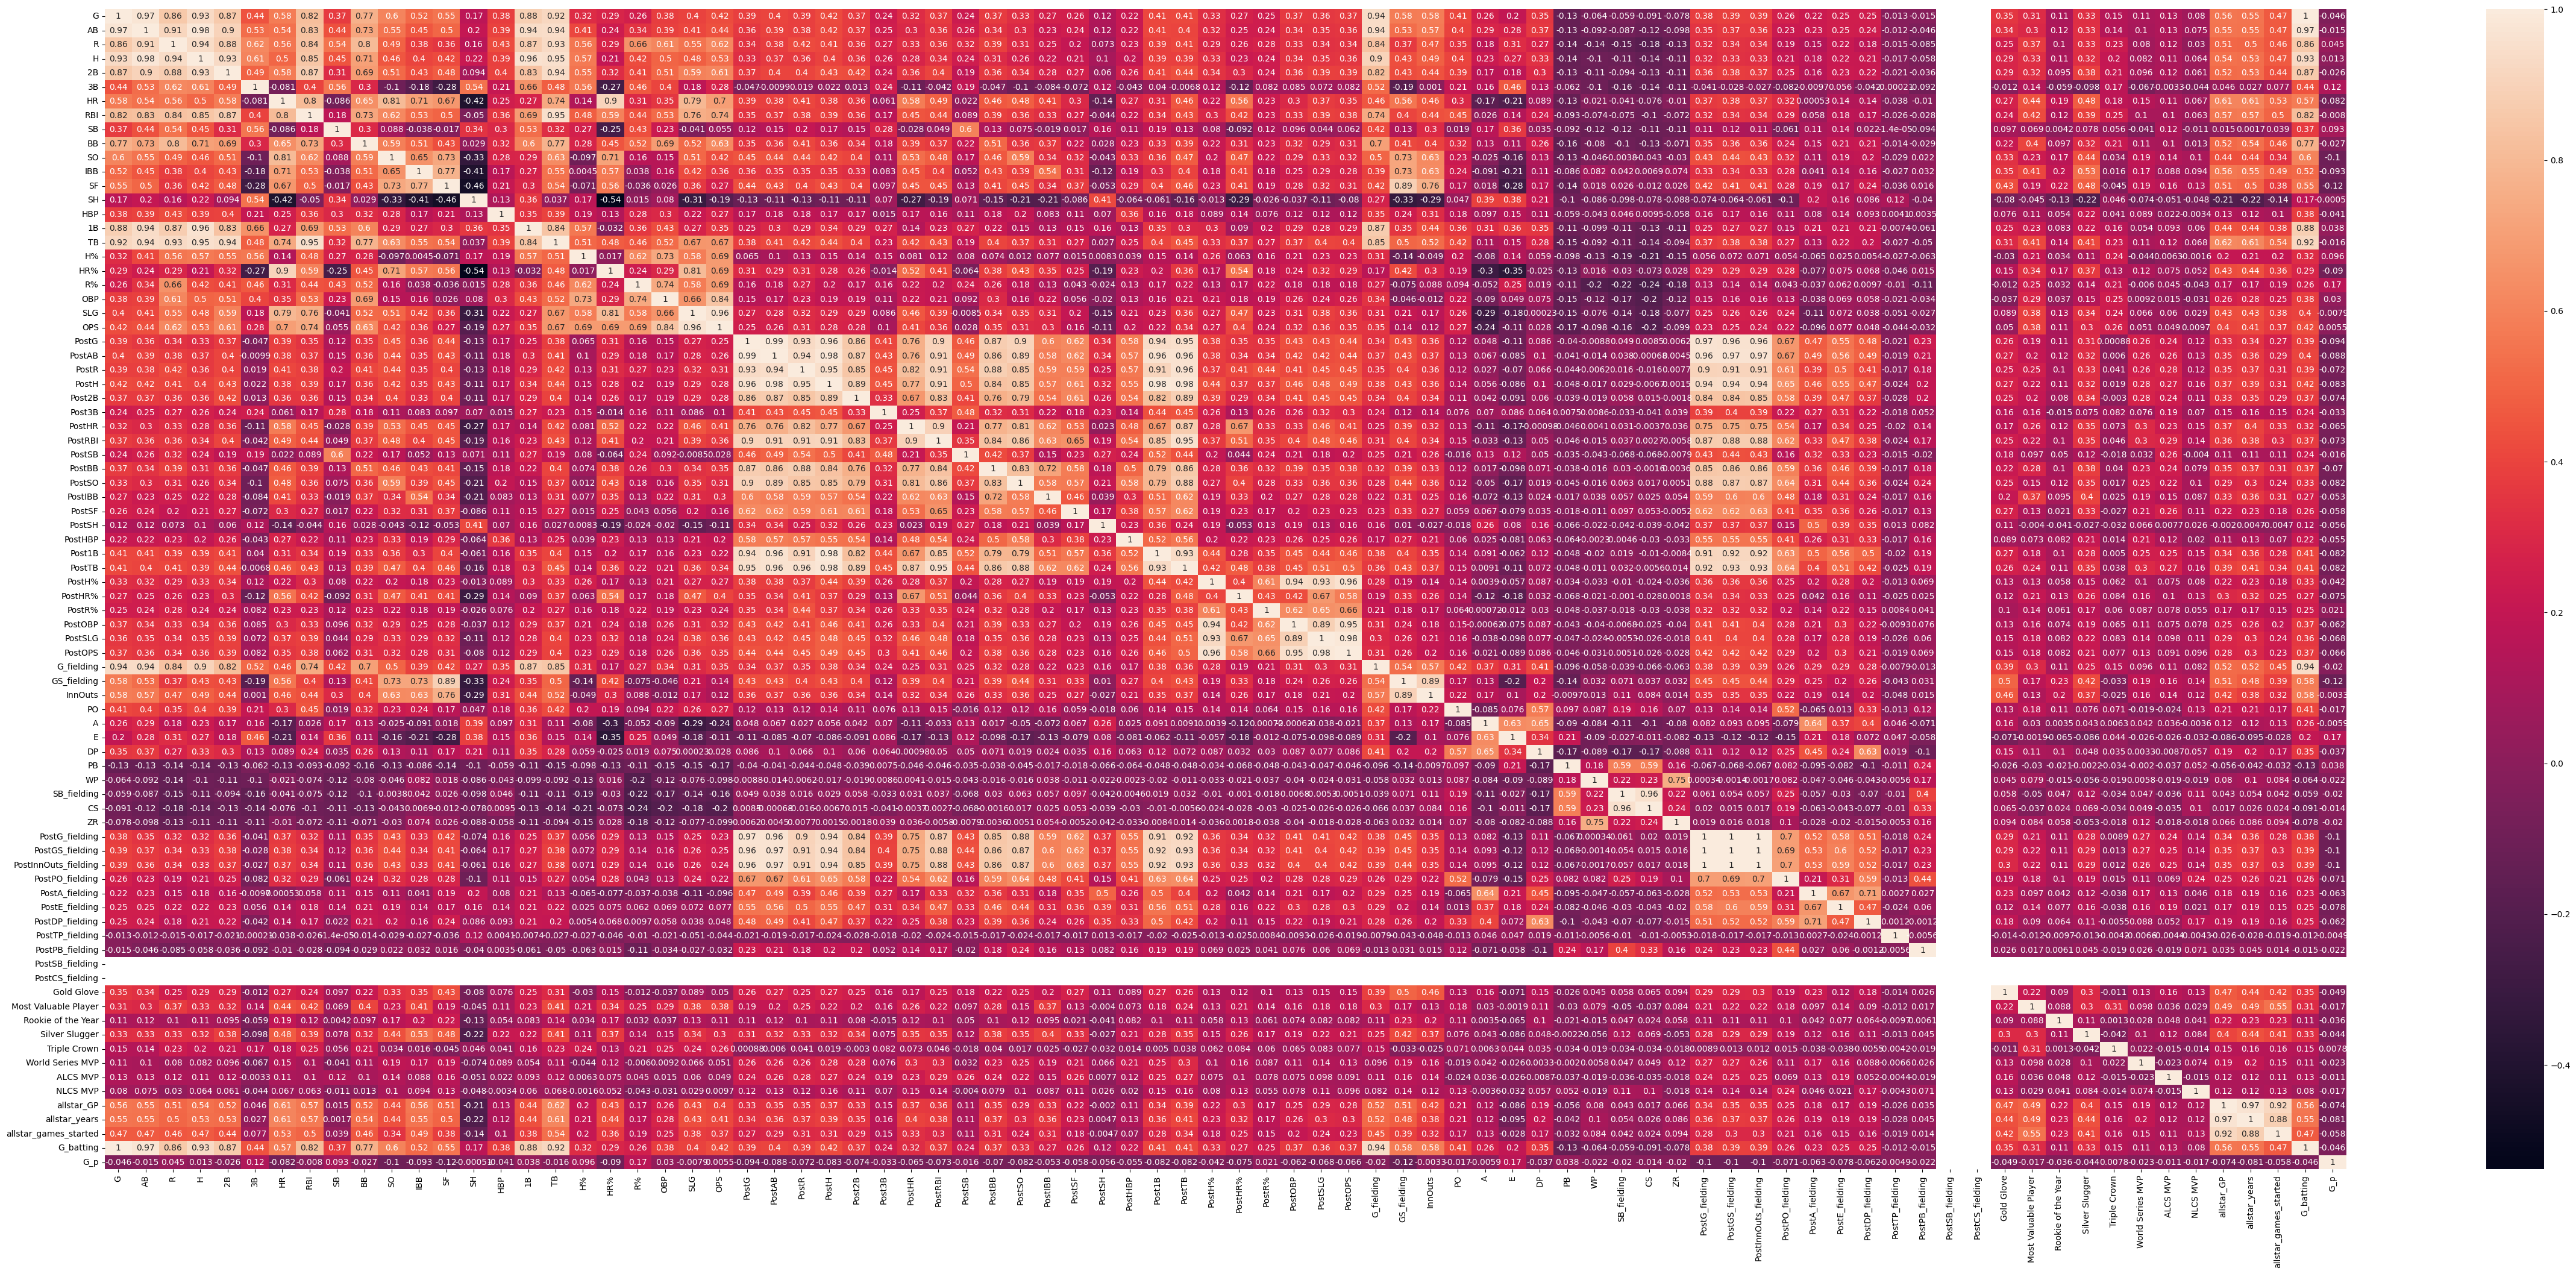

In [1008]:


import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(60, 25))

sns.heatmap(hof_pred_final.corr(), ax=ax, annot=True)

In [1009]:
# there are a lot of variables that are highly correlated in the dataset
# EX: OBP, OPS or allstar_GP and allstar_starts
# we will remove some highly correlated variables and any other variables that won't add much to the analysis
hof_pred_final.drop('PostSB_fielding', axis=1, inplace=True)
hof_pred_final.drop('PostCS_fielding', axis=1, inplace=True)
hof_pred_final.drop('2B', axis=1, inplace=True)
hof_pred_final.drop('3B', axis=1, inplace=True)
hof_pred_final.drop('1B', axis=1, inplace=True)
hof_pred_final.drop('H%', axis=1, inplace=True)
hof_pred_final.drop('HR%', axis=1, inplace=True)
hof_pred_final.drop('R%', axis=1, inplace=True)
hof_pred_final.drop('OBP', axis=1, inplace=True)
hof_pred_final.drop('SLG', axis=1, inplace=True)
hof_pred_final.drop('Post1B', axis=1, inplace=True)
hof_pred_final.drop('Post2B', axis=1, inplace=True)
hof_pred_final.drop('Post3B', axis=1, inplace=True)
hof_pred_final.drop('PostHBP', axis=1, inplace=True)
hof_pred_final.drop('HBP', axis=1, inplace=True)
hof_pred_final.drop('PostH%', axis=1, inplace=True)
hof_pred_final.drop('PostHR%', axis=1, inplace=True)
hof_pred_final.drop('PostR%', axis=1, inplace=True)
hof_pred_final.drop('PostOBP', axis=1, inplace=True)
hof_pred_final.drop('PostSLG', axis=1, inplace=True)
hof_pred_final.drop('G_fielding', axis=1, inplace=True)
hof_pred_final.drop('GS_fielding', axis=1, inplace=True)
hof_pred_final.drop('PB', axis=1, inplace=True)
hof_pred_final.drop('WP', axis=1, inplace=True)
hof_pred_final.drop('SB_fielding', axis=1, inplace=True)
hof_pred_final.drop('CS', axis=1, inplace=True)
hof_pred_final.drop('PostG_fielding', axis=1, inplace=True)
hof_pred_final.drop('PostGS_fielding', axis=1, inplace=True)
hof_pred_final.drop('PostPB_fielding', axis=1, inplace=True)
hof_pred_final.drop('allstar_years', axis=1, inplace=True)
hof_pred_final.drop('allstar_games_started', axis=1, inplace=True)
hof_pred_final.drop('G_p', axis=1, inplace=True)
hof_pred_final.drop('G_batting', axis=1, inplace=True)

In [1010]:
# I also want to change inducted to be binary rather than Y and N
hof_pred_final['inducted'] = hof_pred_final['inducted'].replace({'N': 0, 'Y': 1})

In [1011]:
hof_pred_final.dtypes

inducted                  int64
G                       float64
AB                      float64
R                       float64
H                       float64
HR                      float64
RBI                     float64
SB                      float64
BB                      float64
SO                      float64
IBB                     float64
SF                      float64
SH                      float64
TB                      float64
OPS                     float64
PostG                   float64
PostAB                  float64
PostR                   float64
PostH                   float64
PostHR                  float64
PostRBI                 float64
PostSB                  float64
PostBB                  float64
PostSO                  float64
PostIBB                 float64
PostSF                  float64
PostSH                  float64
PostTB                  float64
PostOPS                 float64
InnOuts                 float64
PO                      float64
A       

In [1012]:
hof_pred_final.describe()

inducted            G            AB            R            H  \
count  786.000000   786.000000    786.000000   786.000000   786.000000   
mean     0.198473  1684.986005   5952.838422   879.035623  1680.577608   
std      0.399104   548.841400   2159.861528   400.581280   674.964367   
min      0.000000   129.000000    157.000000    31.000000    35.000000   
25%      0.000000  1325.250000   4547.750000   605.250000  1229.250000   
50%      0.000000  1689.000000   5929.500000   863.500000  1633.500000   
75%      0.000000  2032.250000   7347.750000  1124.750000  2104.500000   
max      1.000000  3562.000000  14053.000000  2295.000000  4256.000000   

               HR          RBI           SB           BB           SO  \
count  786.000000   786.000000   786.000000   786.000000   786.000000   
mean   153.936387   818.737913   140.062341   625.798982   714.647583   
std    136.967562   402.999850   157.175880   347.670908   440.487537   
min      0.000000    13.000000     0.000000     8.000000     8.000000   
25%     43.000000   521.000000    37.000000   380.250000   362.000000   
50%    112.000000   775.000000    85.000000   564.500000   603.000000   
75%    237.750000  1072.000000   192.000000   828.000000  1002.250000   
max    762.000000  2297.000000  1406.000000  2558.000000  2597.000000   

              IBB          SF          SH           TB         OPS  \
count  786.000000  786.000000  786.000000   786.000000  786.000000   
mean    42.646310   33.702290   70.405852  2551.779898    0.766678   
std     56.689046   33.695193   75.753687  1110.563897    0.089452   
min      0.000000    0.000000    0.000000    54.000000    0.521828   
25%      0.000000    0.000000   16.000000  1761.500000    0.707456   
50%     23.000000   30.000000   44.000000  2494.500000    0.769560   
75%     66.750000   59.000000  100.500000  3234.000000    0.822448   
max    688.000000  128.000000  512.000000  6856.000000    1.115500   

            PostG      PostAB       PostR       PostH      PostHR     PostRBI  \
count  786.000000  786.000000  786.000000  786.000000  786.000000  786.000000   
mean    17.508906   61.022901    7.744275   15.795165    1.688295    7.241730   
std     18.088334   65.966171    9.800533   17.743395    2.953274    9.425137   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      4.000000   11.000000    0.000000    2.000000    0.000000    0.000000   
50%     13.500000   45.000000    5.000000   11.000000    0.000000    4.000000   
75%     25.000000   88.000000   11.000000   22.000000    2.000000   11.000000   
max    125.000000  465.000000   83.000000  128.000000   29.000000   80.000000   

           PostSB      PostBB      PostSO     PostIBB      PostSF      PostSH  \
count  786.000000  786.000000  786.000000  786.000000  786.000000  786.000000   
mean     1.337150    6.209924    9.826972    0.782443    0.413486    0.596692   
std      3.217717    8.955258   13.152146    1.679323    0.868865    1.137184   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
50%      0.000000    3.000000    5.000000    0.000000    0.000000    0.000000   
75%      1.000000    8.000000   13.000000    1.000000    1.000000    1.000000   
max     34.000000   72.000000  109.000000   21.000000    6.000000    8.000000   

           PostTB     PostOPS       InnOuts            PO            A  \
count  786.000000  786.000000    786.000000    786.000000   786.000000   
mean    24.380407    0.558425  27954.961832   4956.627226  1737.648855   
std     28.884643    0.359440  20713.225914   4156.623702  1979.399859   
min      0.000000    0.000000      0.000000     31.000000    23.000000   
25%      2.000000    0.319868   6351.000000   2394.750000   176.500000   
50%     16.000000    0.649237  30659.000000   3561.000000   844.500000   
75%     35.000000    0.788592  44699.500000   5510.500000  2969.750000   
m

<AxesSubplot: >

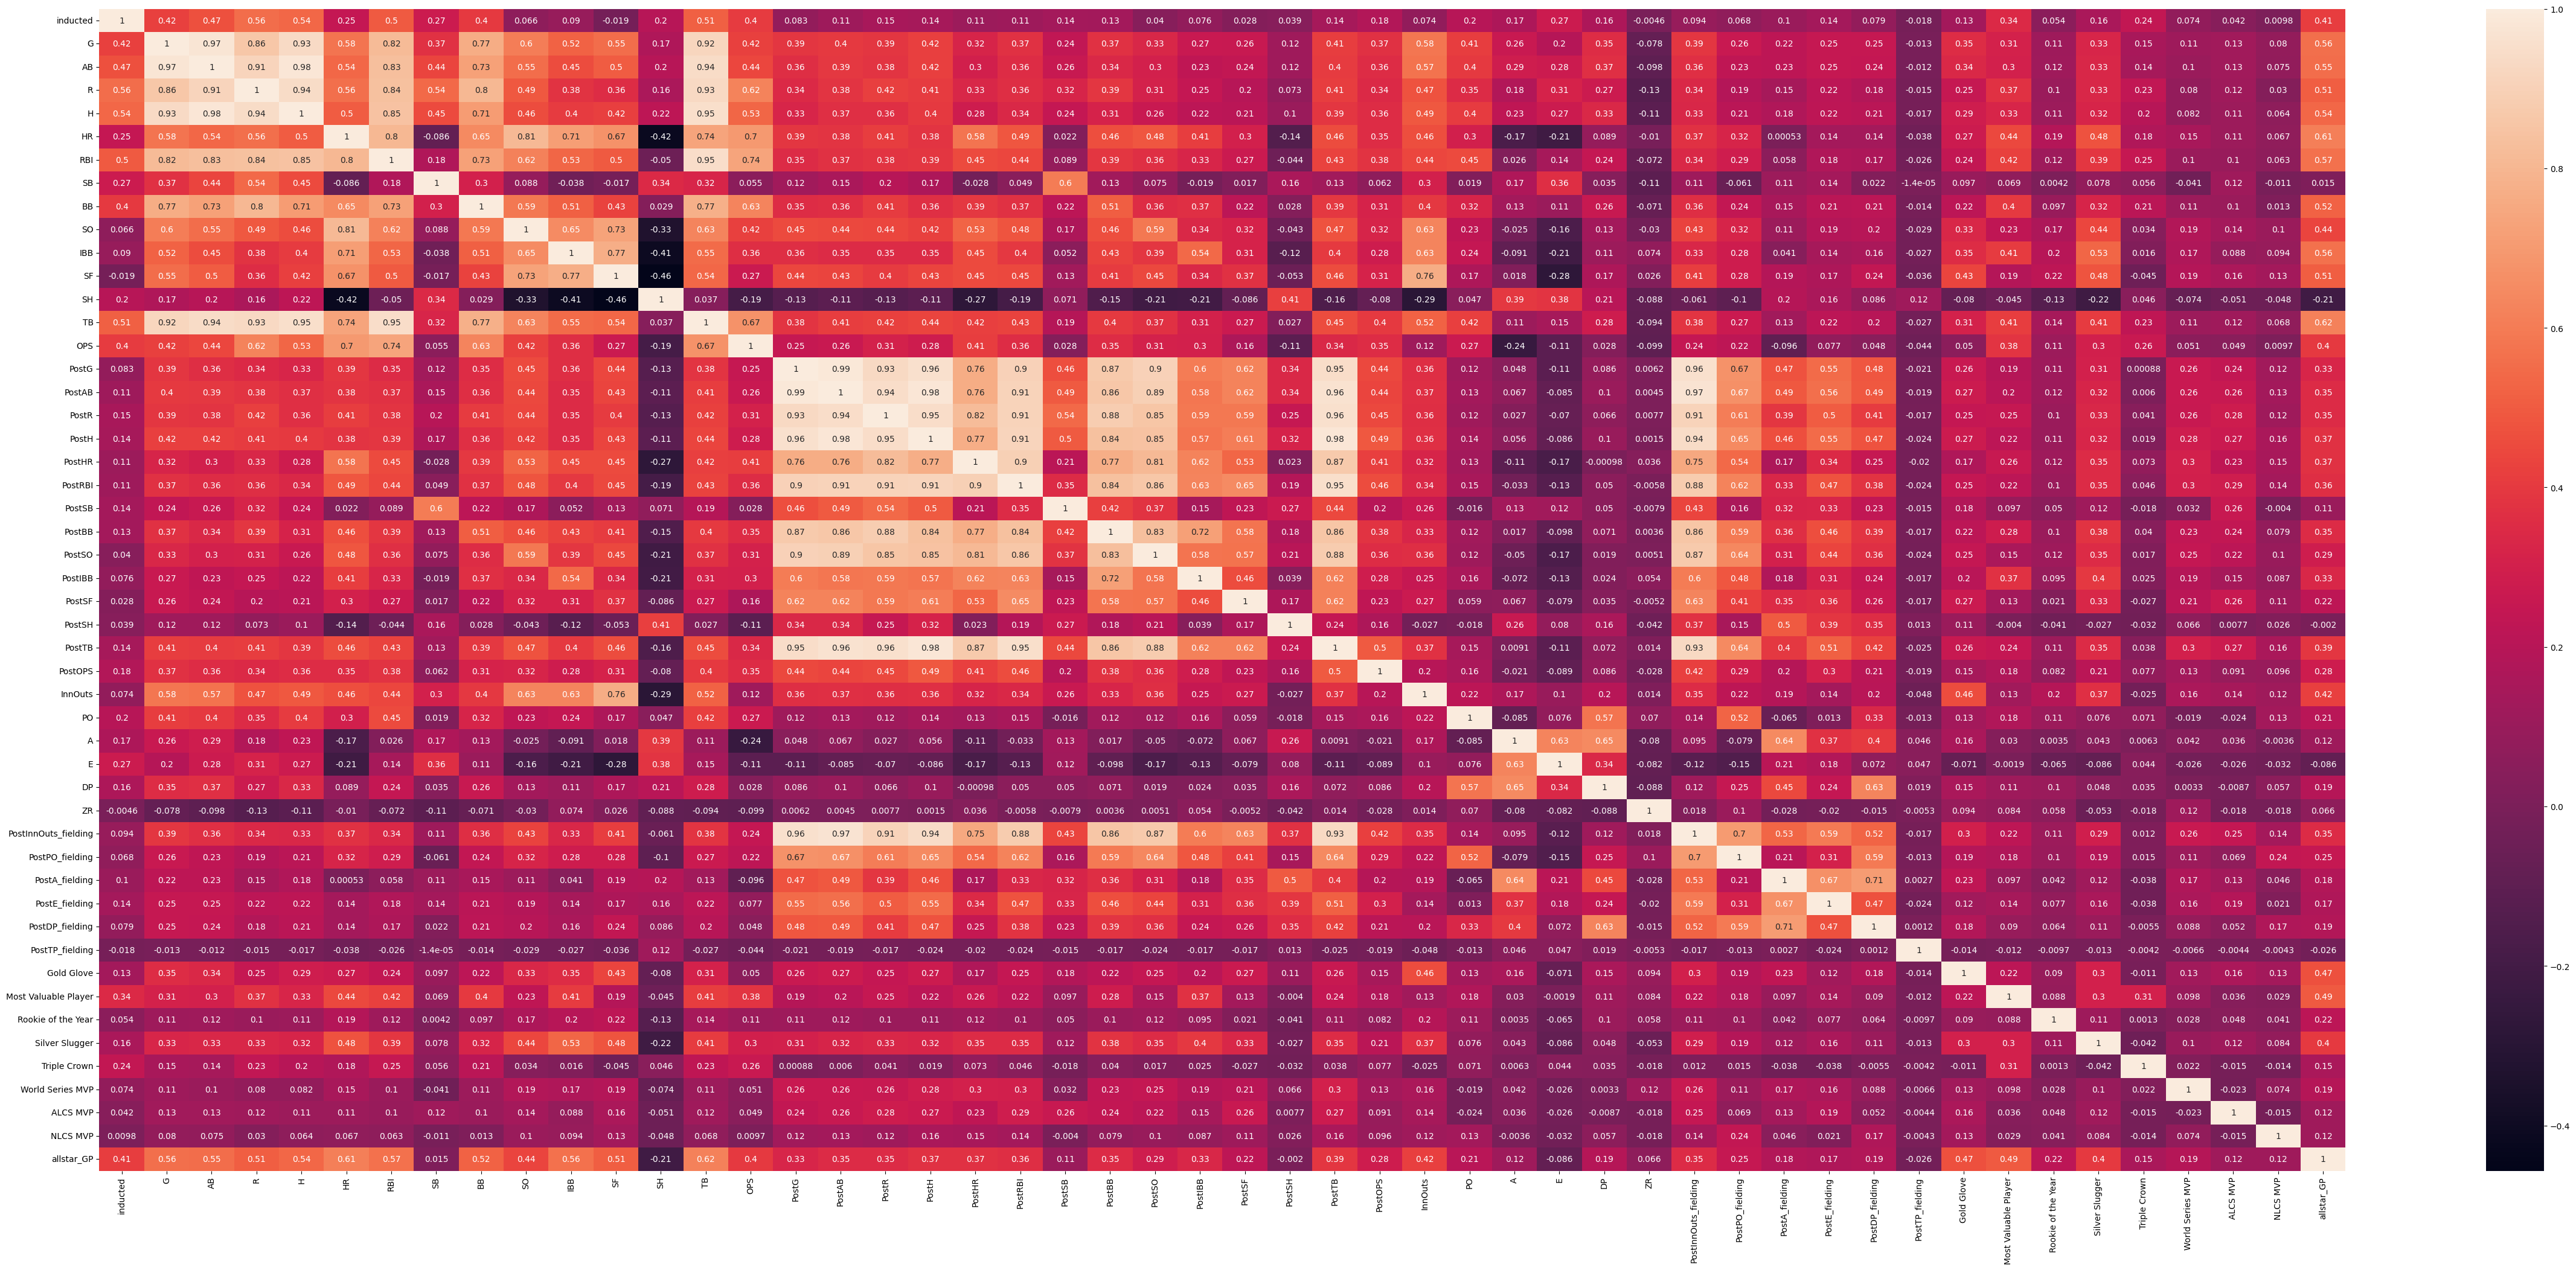

In [1013]:
fig, ax = plt.subplots(figsize=(60, 25))
sns.heatmap(hof_pred_final.corr(), ax=ax, annot=True)

In [1014]:
# Let's see how many instances of hall of famers we are left with in the dataset
hof_pred_final[hof_pred_final.inducted > 0].shape[0]

156

In [1015]:
# % of hall of famers
hof_pred_final[hof_pred_final.inducted > 0].shape[0] / hof_pred_final[hof_pred_final.inducted >= 0].shape[0]

0.1984732824427481

In [1016]:
# roughly 20% of the players in the hall of fame dataset were inducted into the hall of fame
# we can now split our data into training and testing data for the purposes of training a machine learning classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hof_pred_final.iloc[:,1:], hof_pred_final.inducted, test_size=0.2, random_state=42, stratify=hof_pred_final.inducted)

In [1017]:
print("Training shape = ",X_train.shape)
print("Testing shape = ",X_test.shape)
print("Y_training shape = ", y_train.shape)
print("Y_test shape = ", y_test.shape)
print()
print()

Training shape =  (628, 49)
Testing shape =  (158, 49)
Y_training shape =  (628,)
Y_test shape =  (158,)




In [1018]:
y_train[y_train.iloc[:] > 0].shape[0]

125

In [1019]:
y_test[y_test.iloc[:] > 0].shape[0]

31

In [1020]:
# Let's create scaled data that will work better with certain methods
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scale=pd.DataFrame(sc.fit_transform(X_train))
print()
print()
print(X_train_scale.describe())

#Repeat for the test set
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_test_scale=pd.DataFrame(sc.fit_transform(X_test))

print()
print()
print(X_test_scale.describe())



                 0           1             2             3             4   \
count  6.280000e+02  628.000000  6.280000e+02  6.280000e+02  6.280000e+02   
mean   1.697156e-16    0.000000  1.697156e-17  7.920062e-17 -1.018294e-16   
std    1.000797e+00    1.000797  1.000797e+00  1.000797e+00  1.000797e+00   
min   -2.742266e+00   -2.597398 -2.078269e+00 -2.385519e+00 -1.128863e+00   
25%   -6.652754e-01   -0.696519 -7.000402e-01 -6.815265e-01 -8.124442e-01   
50%    4.535254e-03   -0.009467 -4.706356e-02 -5.745150e-02 -2.826260e-01   
75%    6.196765e-01    0.627215  6.177514e-01  6.283330e-01  6.022440e-01   
max    3.361144e+00    3.694044  3.564246e+00  3.816295e+00  4.478379e+00   

                 5             6             7             8             9   \
count  6.280000e+02  6.280000e+02  6.280000e+02  6.280000e+02  6.280000e+02   
mean  -5.657187e-17 -3.394312e-17 -1.442583e-16 -9.758648e-17 -7.495773e-17   
std    1.000797e+00  1.000797e+00  1.000797e+00  1.000797e+00  1.00

In [1021]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_scale, y_train)

LogisticRegression()

In [1022]:
y_pred_log_scale = log_reg.predict(X_test_scale)

In [1023]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

print(accuracy_score(y_train, log_reg.predict(X_train_scale)))

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test_scale))
print(log_reg_acc)

0.9124203821656051
0.9050632911392406


In [1024]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_log_scale).ravel()

print(confusion_matrix(y_test, y_pred_log_scale))
print()
print()

print(f'\nTrue Positives: {tp}')
print(f'\nFalse Positives: {fp}')
print(f'\nTrue Negatives: {tn}')
print(f'\nFalse Negatives: {fn}')

print()
print()
print(f'True Positive Rate: { (tp / (tp + fn))}')
print(f'Specificity: { (tn / (tn + fp))}')
print(f'False Positive Rate: { (fp / (fp + tn))}')

tpr = (tp / (tp + fn))
fpr = (tn / (tn + fp))

[[123   4]
 [ 11  20]]



True Positives: 20

False Positives: 4

True Negatives: 123

False Negatives: 11


True Positive Rate: 0.6451612903225806
Specificity: 0.968503937007874
False Positive Rate: 0.031496062992125984


In [1025]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import time
start = time.time()

clf = SGDClassifier(random_state=42)
clf.fit(X_train_scale, y_train)
prediction_training = clf.predict(X_train_scale)
prediction = clf.predict(X_test_scale)
scores = cross_val_score(clf, X_train_scale, y_train, cv=5)

end = time.time()

# accuracy_all.append(accuracy_score(prediction, y_test))
# cvs_all.append(np.mean(scores))

print("SGD Classifier Accuracy Training: {0:.2%}".format(accuracy_score(prediction_training, y_train)))
print("SGD Classifier Accuracy Testing: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))
print(classification_report( y_test,prediction))

SGD Classifier Accuracy Training: 89.33%
SGD Classifier Accuracy Testing: 88.61%
Cross validation score: 85.50% (+/- 4.18%)
Execution time: 0.04501 seconds 

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       127
           1       0.74      0.65      0.69        31

    accuracy                           0.89       158
   macro avg       0.83      0.80      0.81       158
weighted avg       0.88      0.89      0.88       158



In [1026]:
tn3, fp3, fn3, tp3 = confusion_matrix(y_test, prediction).ravel()
print(confusion_matrix(y_test, prediction))
print()
print()

print(f'\nTrue Positives: {tp3}')
print(f'\nFalse Positives: {fp3}')
print(f'\nTrue Negatives: {tn3}')
print(f'\nFalse Negatives: {fn3}')

print()
print()
print(f'True Positive Rate: { (tp3 / (tp3 + fn3))}')
print(f'Specificity: { (tn3 / (tn3 + fp3))}')
print(f'False Positive Rate: { (fp3 / (fp3 + tn3))}')

tpr = (tp3 / (tp3 + fn3))
fpr = (tn3 / (tn3 + fp3))

[[120   7]
 [ 11  20]]



True Positives: 20

False Positives: 7

True Negatives: 120

False Negatives: 11


True Positive Rate: 0.6451612903225806
Specificity: 0.9448818897637795
False Positive Rate: 0.05511811023622047


In [1027]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
classifier5 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier5.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [1028]:
y_pred_KNN5 = classifier5.predict(X_test_scale)
y_pred_KNN5_training = classifier5.predict(X_train_scale)

In [1029]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm5 = confusion_matrix(y_test, y_pred_KNN5)
ac5 = accuracy_score(y_test,y_pred_KNN5)
ac5_training = accuracy_score(y_train,y_pred_KNN5_training)

In [1030]:
cm5 #KNN confusion matrix

array([[124,   3],
       [ 16,  15]], dtype=int64)

In [1031]:
ac5 #KNN accuracy

0.879746835443038

In [1032]:
ac5_training

0.8789808917197452

In [1033]:
classifier3 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier3.fit(X_train_scale, y_train)

KNeighborsClassifier(n_neighbors=3)

In [1034]:
y_pred_KNN3 = classifier3.predict(X_test_scale)
y_pred_KNN3_training = classifier3.predict(X_train_scale)

In [1035]:
cm3 = confusion_matrix(y_test, y_pred_KNN3)
ac3 = accuracy_score(y_test,y_pred_KNN3)
ac3_training = accuracy_score(y_train,y_pred_KNN3_training)

In [1036]:
cm3

array([[123,   4],
       [ 16,  15]], dtype=int64)

In [1037]:
ac3

0.8734177215189873

In [1038]:
ac3_training

0.9203821656050956

In [1039]:
classifier7 = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier7.fit(X_train_scale, y_train)

KNeighborsClassifier(n_neighbors=7)

In [1040]:
y_pred_KNN7 = classifier7.predict(X_test_scale)
y_pred_KNN7_training = classifier7.predict(X_train_scale)

In [1041]:
cm7 = confusion_matrix(y_test, y_pred_KNN7)
ac7 = accuracy_score(y_test,y_pred_KNN7)

In [1042]:
cm7

array([[125,   2],
       [ 16,  15]], dtype=int64)

In [1043]:
ac7

0.8860759493670886

In [1044]:
ac7_training = accuracy_score(y_train,y_pred_KNN7_training)
ac7_training

0.8694267515923567

In [1045]:
# what if we used PCA to reduce the dimensionality and then re-try all of the methods
# we can use PCA to reduce the dataset
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_train_reduced_scale = pca.fit_transform(X_train_scale)
X_test_reduced = pca.transform(X_test)
X_test_reduced_scale = pca.transform(X_test_scale)

C:\anaconda\envs\py39\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [1046]:
#Logistic Regression w/ PCA
log_reg = LogisticRegression()
log_reg.fit(X_train_reduced_scale, y_train)
y_pred_log_PCA = log_reg.predict(X_test_reduced_scale)

In [1047]:
print(accuracy_score(y_train, log_reg.predict(X_train_reduced_scale)))

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test_reduced_scale))
print(log_reg_acc)

0.8964968152866242
0.8924050632911392


In [1048]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred_log_PCA).ravel()
print(confusion_matrix(y_test, y_pred_log_PCA))
print()
print()

print(f'\nTrue Positives: {tp2}')
print(f'\nFalse Positives: {fp2}')
print(f'\nTrue Negatives: {tn2}')
print(f'\nFalse Negatives: {fn2}')

print()
print()
print(f'True Positive Rate: { (tp2 / (tp2 + fn2))}')
print(f'Specificity: { (tn2 / (tn2 + fp2))}')
print(f'False Positive Rate: { (fp2 / (fp2 + tn2))}')

tpr = (tp2 / (tp2 + fn2))
fpr = (tn2 / (tn2 + fp2))

[[121   6]
 [ 11  20]]



True Positives: 20

False Positives: 6

True Negatives: 121

False Negatives: 11


True Positive Rate: 0.6451612903225806
Specificity: 0.952755905511811
False Positive Rate: 0.047244094488188976


In [1049]:
# as we can see, PCA did not improve the accuracy on the training or testing set

In [1050]:
# next we can try SGD
sgd_clf_with_pca = SGDClassifier(random_state=42)
sgd_clf_with_pca.fit(X_train_reduced_scale, y_train)

SGDClassifier(random_state=42)

In [1051]:
#training accuracy
y_pred_sgd_pca_train = sgd_clf_with_pca.predict(X_train_reduced_scale)
accuracy_score(y_train, y_pred_sgd_pca_train)

0.8662420382165605

In [1052]:
y_pred_sgd_pca = sgd_clf_with_pca.predict(X_test_reduced_scale)
accuracy_score(y_test, y_pred_sgd_pca)

0.8734177215189873

In [1053]:
tn4, fp4, fn4, tp4 = confusion_matrix(y_test, y_pred_sgd_pca).ravel()
print(confusion_matrix(y_test, y_pred_sgd_pca))
print()
print()

print(f'\nTrue Positives: {tp4}')
print(f'\nFalse Positives: {fp4}')
print(f'\nTrue Negatives: {tn4}')
print(f'\nFalse Negatives: {fn4}')

print()
print()
print(f'True Positive Rate: { (tp4 / (tp4 + fn4))}')
print(f'Specificity: { (tn4 / (tn4 + fp4))}')
print(f'False Positive Rate: { (fp4 / (fp4 + tn4))}')

tpr = (tp4 / (tp4 + fn4))
fpr = (tn4 / (tn4 + fp4))

[[117  10]
 [ 10  21]]



True Positives: 21

False Positives: 10

True Negatives: 117

False Negatives: 10


True Positive Rate: 0.6774193548387096
Specificity: 0.9212598425196851
False Positive Rate: 0.07874015748031496


In [1054]:
# the performance of SGD was worse using PCA

In [1055]:
#Random Forest Classification

In [1056]:
param_grid = {
                 'n_estimators': [5, 10, 15, 20, 25, 40],
                 'max_depth': [2, 5, 7, 9, 15, 25, 50]
             }

In [1057]:
# trying random forest with cross validation to reduce overfitting
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rnd_clf = RandomForestClassifier(random_state=42)

grid_clf = GridSearchCV(rnd_clf, param_grid, cv=5)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 5, 7, 9, 15, 25, 50],
                         'n_estimators': [5, 10, 15, 20, 25, 40]})

In [1058]:
y_pred_rf_cv = grid_clf.predict(X_test)
accuracy_score(y_test, y_pred_rf_cv)

0.9177215189873418

In [1059]:
y_pred_rf_cv_train = grid_clf.predict(X_train)
accuracy_score(y_train, y_pred_rf_cv_train)

0.9538216560509554

In [1060]:
conf_matr = confusion_matrix(y_test, y_pred_rf_cv)
print(conf_matr)

[[122   5]
 [  8  23]]


In [1061]:
# Random Forest with PCA and Cross Validation
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
rnd_clf_pca_cv = RandomForestClassifier(random_state=42)
rnd_clf_pca_cv.fit(X_train_reduced, y_train)

RandomForestClassifier(random_state=42)

In [1062]:
grid_clf_pca = GridSearchCV(rnd_clf_pca_cv, param_grid, cv=5)
rf_model = grid_clf_pca.fit(X_train_reduced, y_train)

In [1063]:
y_pred_rf_cv_pca = grid_clf_pca.predict(X_test_reduced)
accuracy_score(y_test, y_pred_rf_cv_pca)

0.8037974683544303

In [1064]:
y_pred_rf_cv_pca_training = grid_clf_pca.predict(X_train_reduced)
accuracy_score(y_train, y_pred_rf_cv_pca_training)

0.8821656050955414

In [1065]:
conf_matri = confusion_matrix(y_test, y_pred_rf_cv_pca)
print(conf_matri)

[[122   5]
 [ 26   5]]


In [1066]:
# RF feature importance
feature_importances = grid_clf.best_estimator_.feature_importances_
importance_df = pd.DataFrame(feature_importances, index=X_train.columns, 
                      columns=["Importance"])
importance_df.sort_values("Importance", ascending=False)

Importance
R                       0.146077
H                       0.091998
allstar_GP              0.088660
TB                      0.078270
AB                      0.074289
RBI                     0.061179
OPS                     0.057754
IBB                     0.033406
InnOuts                 0.030527
SF                      0.029900
SH                      0.024257
SO                      0.023503
PO                      0.020202
A                       0.020001
PostOPS                 0.018473
HR                      0.018456
G                       0.014858
BB                      0.014719
PostInnOuts_fielding    0.013552
DP                      0.013231
Most Valuable Player    0.012209
E                       0.011908
Silver Slugger          0.008150
SB                      0.008105
PostRBI                 0.007502
PostPO_fielding         0.007044
PostR                   0.006670
PostSO                  0.006503
PostAB                  0.006425
PostTB                  0.005759
PostSB                  0.005211
PostBB                  0.004868
PostDP_fielding         0.004789
PostG                   0.004525
PostIBB                 0.004158
PostH                   0.004119
PostA_fielding          0.003780
PostSF                  0.003612
Gold Glove              0.002376
PostSH                  0.002316
PostE_fielding          0.001856
ZR                      0.001609
Triple Crown            0.001440
PostHR                  0.000960
World Series MVP        0.000515
Rookie of the Year      0.000279
PostTP_fielding         0.000000
ALCS MVP                0.000000
NLCS MVP                0.000000

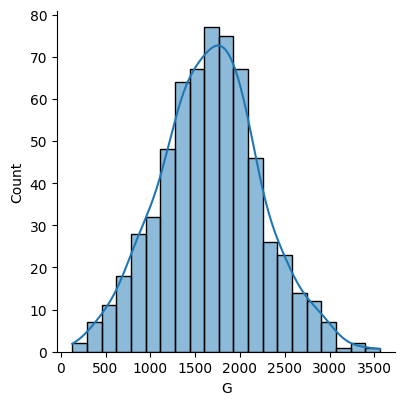

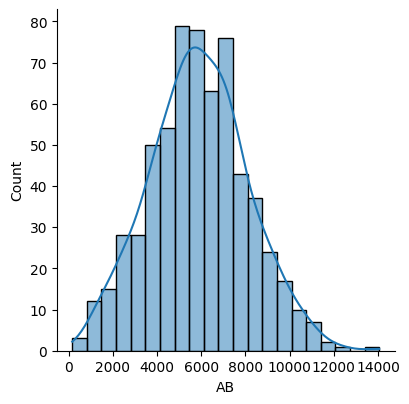

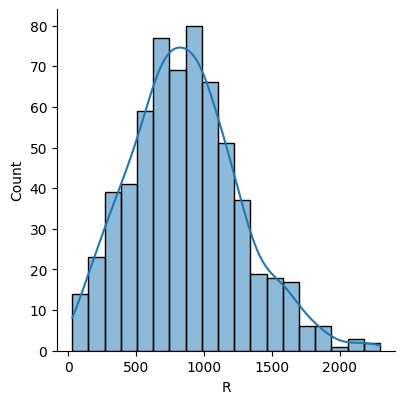

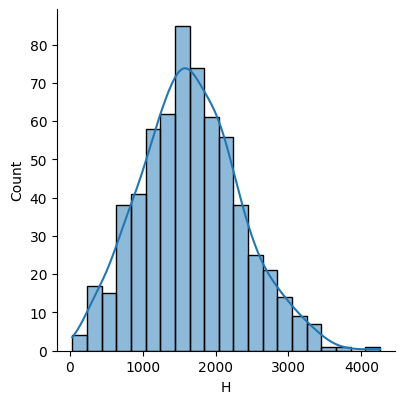

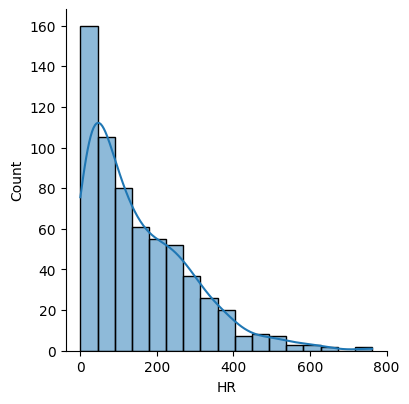

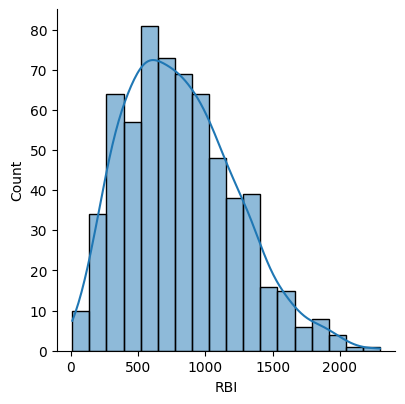

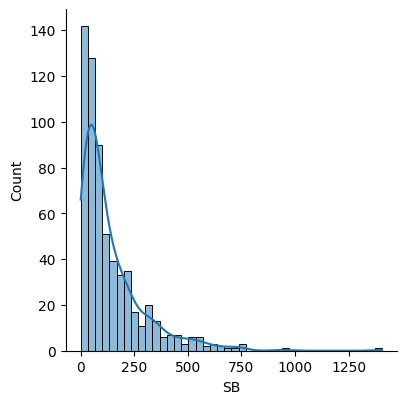

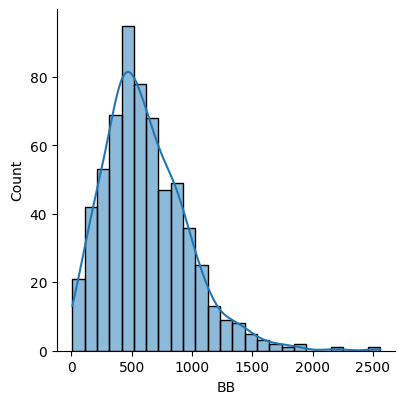

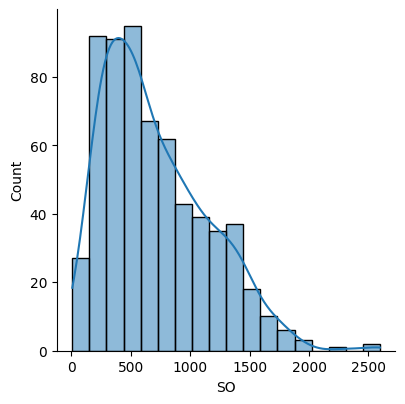

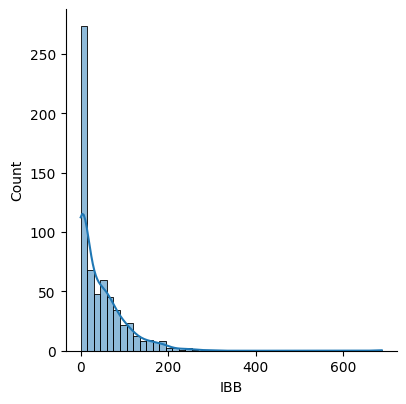

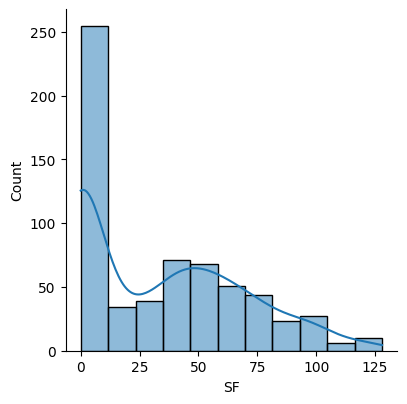

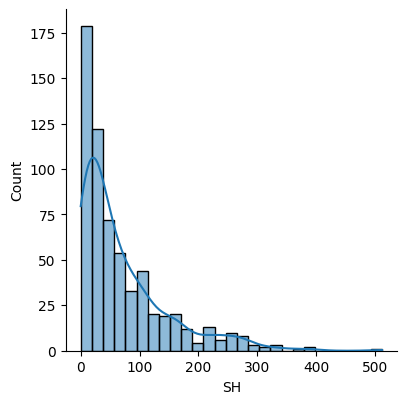

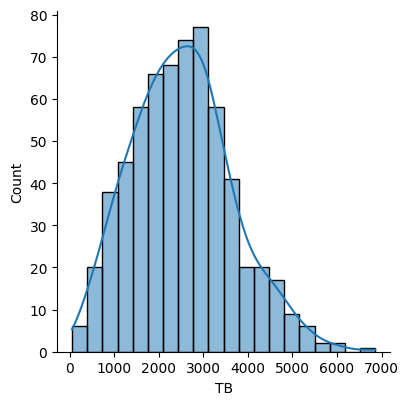

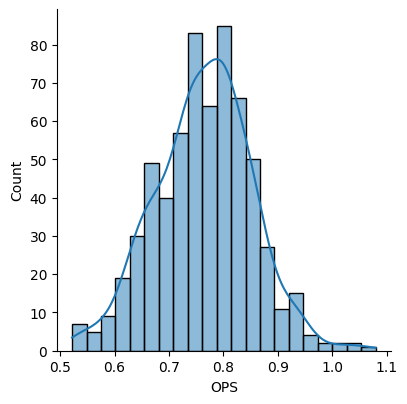

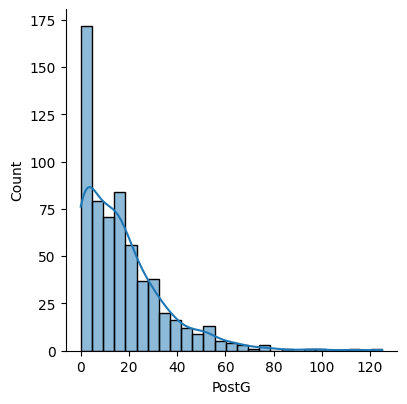

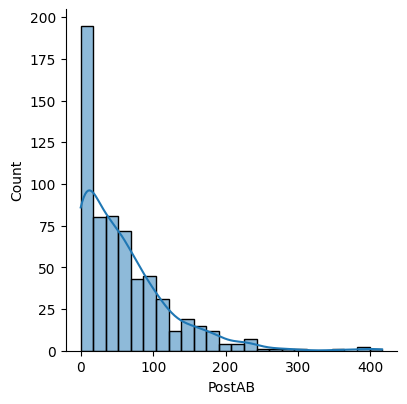

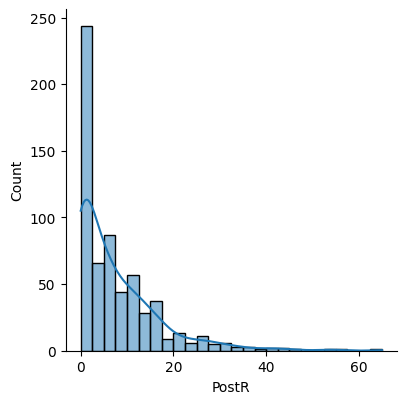

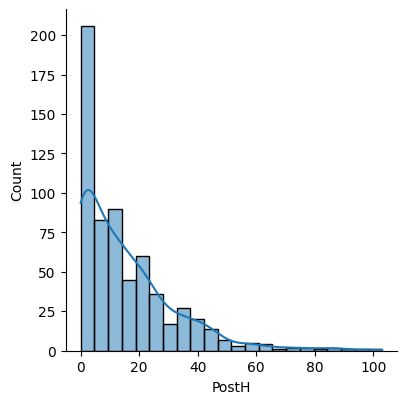

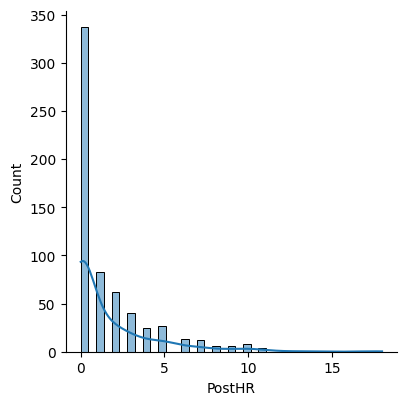

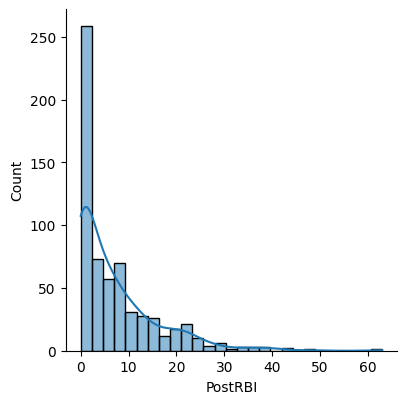

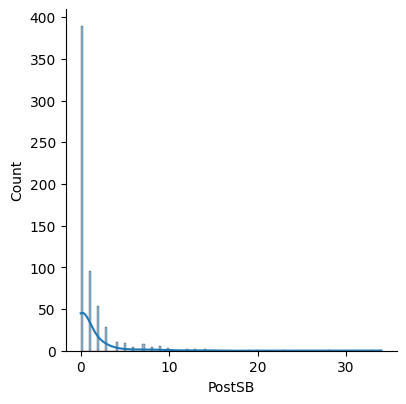

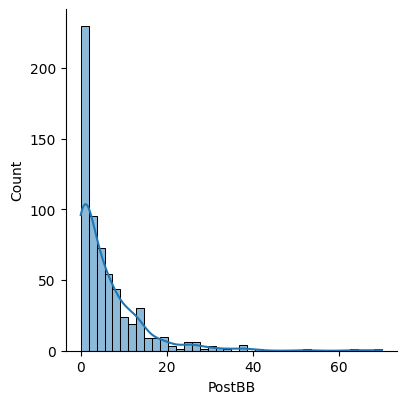

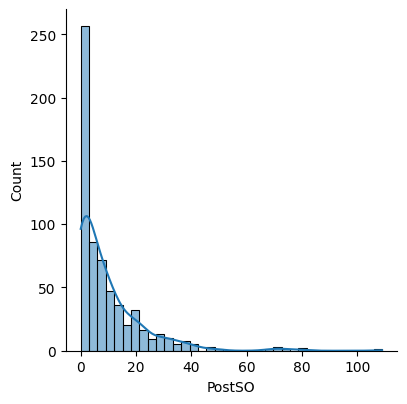

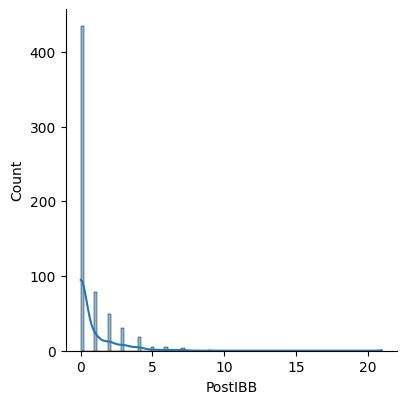

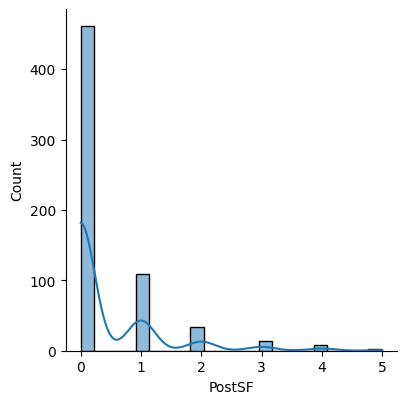

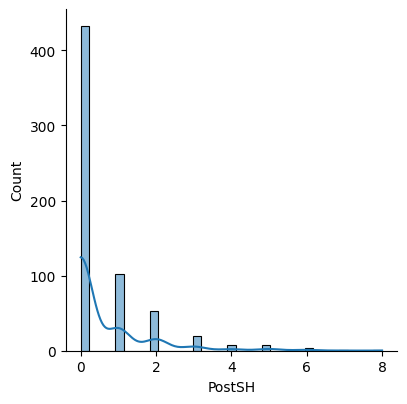

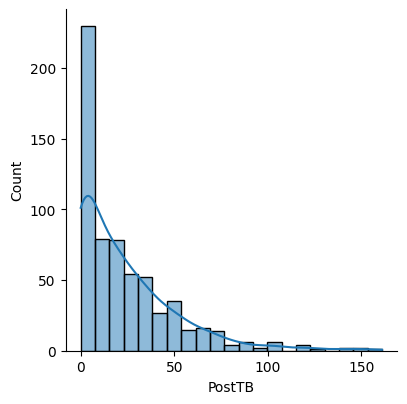

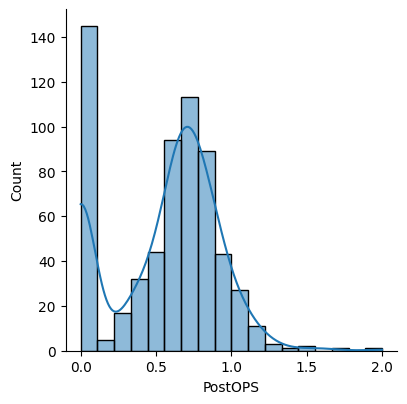

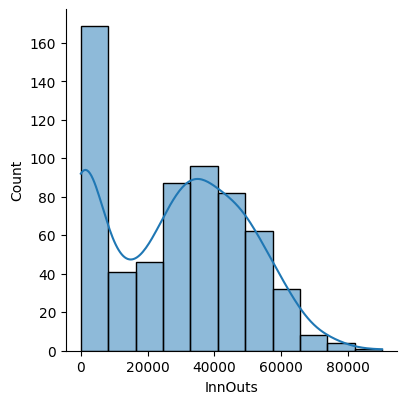

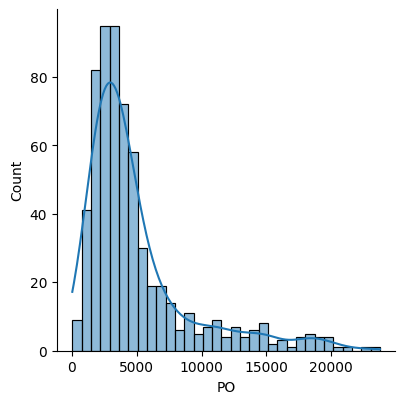

In [1067]:
plotnumber = 1

for column in X_train:
    if plotnumber <= 30:
        #ax = plt.subplot(5, 6, plotnumber)
        g = sns.displot(data=X_train[column], kde=True)
        plt.xlabel(column)
        g.fig.set_size_inches(4,4)
        plt.show()
        
    plotnumber += 1


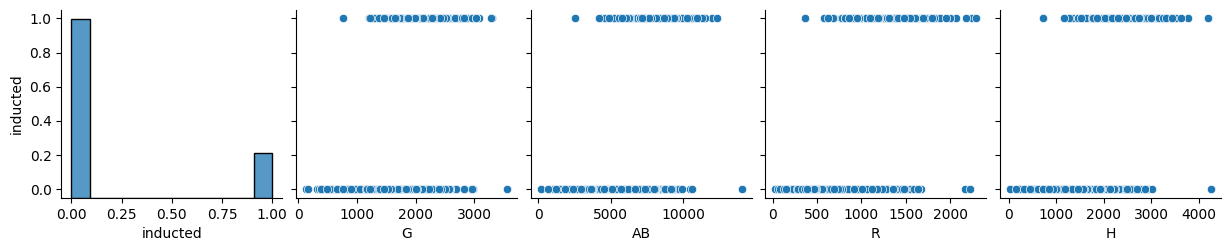

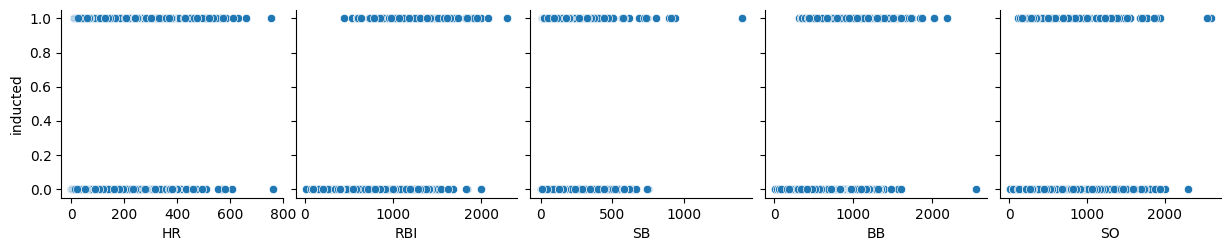

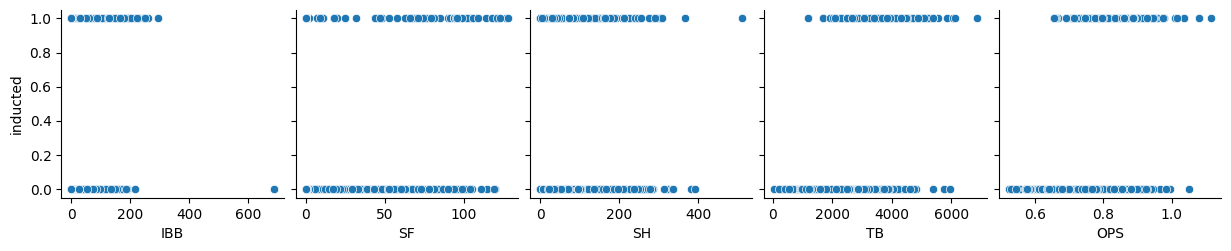

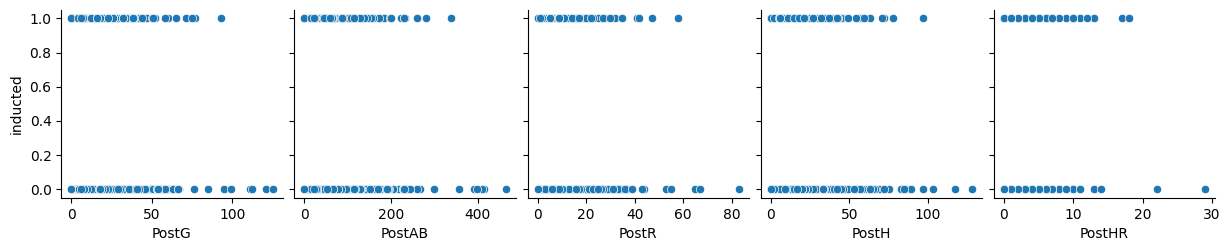

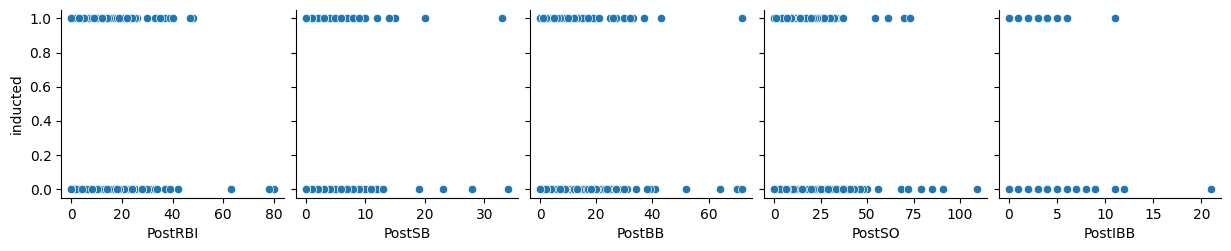

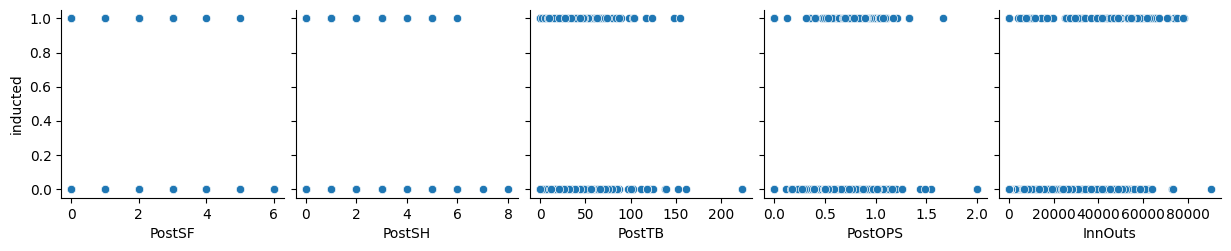

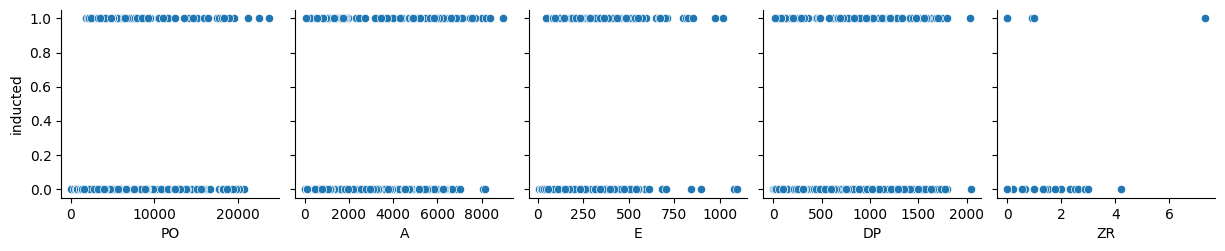

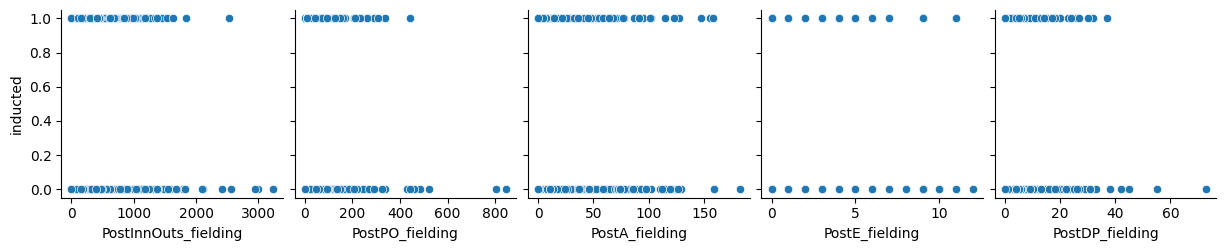

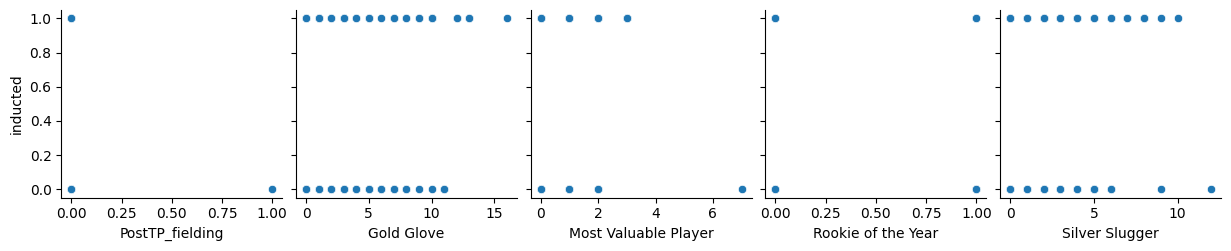

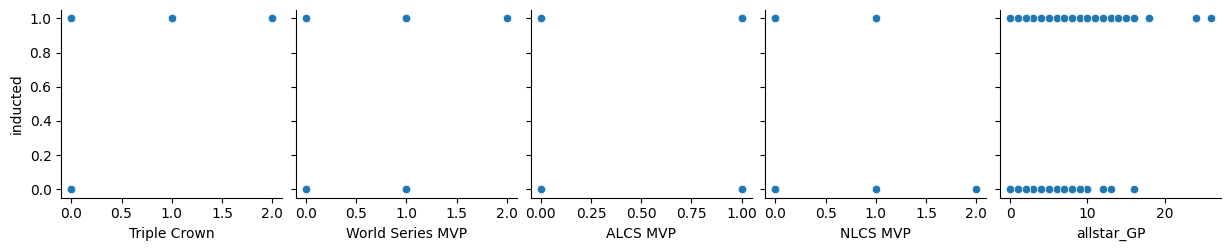

In [1068]:
for i in range(0, len(hof_pred_final.columns), 5):
    sns.pairplot(data=hof_pred_final,
                x_vars=hof_pred_final.columns[i:i+5],
                y_vars=['inducted'])


In [1071]:
hof_pred_final_inducted = hof_pred_final.loc[hof_pred_final['inducted'] > 0]
hof_pred_final_not = hof_pred_final.loc[hof_pred_final['inducted'] == 0]

hof_pred_final_inducted = hof_pred_final_inducted[['R', 'H', 'allstar_GP', 'TB', 'AB', 'RBI', 'OPS', 'IBB', 'InnOuts', 'SF']]
hof_pred_final_not = hof_pred_final_not[['R', 'H', 'allstar_GP', 'TB', 'AB', 'RBI', 'OPS', 'IBB', 'InnOuts', 'SF']]

In [1072]:
hof_pred_final_inducted.describe()

R            H  allstar_GP           TB            AB  \
count   156.000000   156.000000  156.000000   156.000000    156.000000   
mean   1326.320513  2407.551282    5.557692  3697.589744   7972.096154   
std     352.186277   582.921101    5.783447   998.742725   1847.134704   
min     366.000000   731.000000    0.000000  1187.000000   2499.000000   
25%    1093.250000  2036.250000    0.000000  3036.250000   6588.000000   
50%    1298.000000  2384.500000    5.000000  3664.000000   8118.000000   
75%    1583.000000  2818.750000   10.000000  4415.750000   9294.750000   
max    2295.000000  4189.000000   26.000000  6856.000000  12364.000000   

               RBI         OPS         IBB       InnOuts          SF  
count   156.000000  156.000000  156.000000    156.000000  156.000000  
mean   1222.602564    0.839287   52.923077  31052.455128   32.410256  
std     381.948953    0.082303   76.707449  26772.152687   42.637538  
min     443.000000    0.653300    0.000000      0.000000    0.000000  
25%     944.750000    0.796565    0.000000      0.000000    0.000000  
50%    1204.500000    0.836025    0.000000  33987.000000    0.000000  
75%    1511.500000    0.886912  105.250000  55916.000000   71.500000  
max    2297.000000    1.115500  293.000000  78414.000000  128.000000

In [1073]:
hof_pred_final_not.describe()

R            H  allstar_GP           TB            AB  \
count   630.000000   630.000000  630.000000   630.000000    630.000000   
mean    768.279365  1500.565079    1.846032  2268.055556   5452.831746   
std     328.318283   566.836440    2.291917   941.911399   1928.615581   
min      31.000000    35.000000    0.000000    54.000000    157.000000   
25%     549.250000  1131.250000    0.000000  1614.250000   4155.750000   
50%     759.500000  1508.500000    1.000000  2262.000000   5504.500000   
75%     985.000000  1905.500000    3.000000  2922.000000   6865.500000   
max    2227.000000  4256.000000   16.000000  5976.000000  14053.000000   

               RBI         OPS         IBB       InnOuts          SF  
count   630.000000  630.000000  630.000000    630.000000  630.000000  
mean    718.733333    0.748699   40.101587  27187.963492   34.022222  
std     340.983286    0.081766   50.279560  18864.056156   31.119895  
min      13.000000    0.521828    0.000000      0.000000    0.000000  
25%     452.500000    0.693618    0.000000   8678.500000    0.000000  
50%     695.500000    0.750855   27.000000  30306.000000   34.000000  
75%     967.750000    0.802525   62.000000  42254.750000   57.000000  
max    1996.000000    1.051180  688.000000  90298.000000  120.000000